In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

# 1. Customer Dataset

In [2]:
olist_cust_dataset = pd.read_csv('Sales/olist_customers_dataset.csv')
olist_cust_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
#checking the dtype

olist_cust_dataset.info()

#no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
# checking if some columns can be decompressed to smaller integer size int8 or 16:

olist_cust_dataset['customer_zip_code_prefix'].max()

#turns out the max is more than 32k, meaning that in64 has to be used.

99990

In [5]:
#check uniques in each column

olist_cust_dataset.nunique()

# upon checking, it seems like the customer id and unique id are almost the same.

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

### Observations
1. The dataset contains unique customer id and locations
2. There is information about the address, which means we could use it in Tableau for geospatial analysis

# 2. Order Item Dataset

In [6]:
#loading dataset

olist_order_item_dataset = pd.read_csv('Sales/olist_order_items_dataset.csv')
olist_order_item_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
olist_order_item_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
# checking if some column dtypes can be decompressed:

olist_order_item_dataset[['order_item_id', 'price', 'freight_value']].describe()

#column order item id can be changed to int8, while the rest can be changed to float32?

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [9]:
#not much change in terms of value when using float32. Keep it at float64, and change only the order_item_id to int8

olist_order_item_dataset = olist_order_item_dataset.astype({'order_item_id': 'int8',
                                                            'shipping_limit_date': 'datetime64'
                                                           })
olist_order_item_dataset


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [10]:
olist_order_item_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int8          
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int8(1), object(3)
memory usage: 5.3+ MB


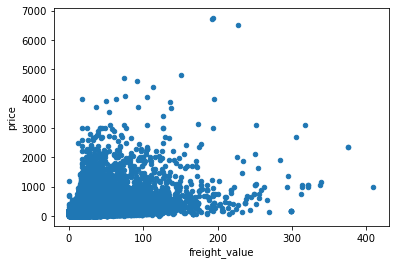

In [11]:
#see if there is any relationship between price and freight value

olist_order_item_dataset[
    ['price', 'freight_value']
    ].plot.scatter(x='freight_value', y='price'
                  );

#no particular trend between freight value and price.

In [12]:
# checking unique data in each column

olist_order_item_dataset.nunique()


order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

### Observations
1. The 90k order is only for 12 items (order_item_id) and from 3k seller id.
2. No relationship between freight value and price


# 3. Order Review

In [13]:
olist_order_reviews_dataset = pd.read_csv('Sales/olist_order_reviews_dataset.csv')
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [15]:
#changing some dtypes
olist_order_reviews_dataset = olist_order_reviews_dataset.astype({'review_score': 'int8',
                                                                  'review_creation_date': 'datetime64',
                                                                  'review_answer_timestamp': 'datetime64',
                                                                 })
olist_order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [16]:
olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int8          
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int8(1), object(4)
memory usage: 4.6+ MB


In [17]:
olist_order_reviews_dataset.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [18]:
# appears to be having a lot of nan data in review comment title and message

olist_order_reviews_dataset.isnull().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [19]:
olist_order_reviews_dataset['review_time_duration'] = olist_order_reviews_dataset['review_answer_timestamp'] - olist_order_reviews_dataset['review_creation_date']

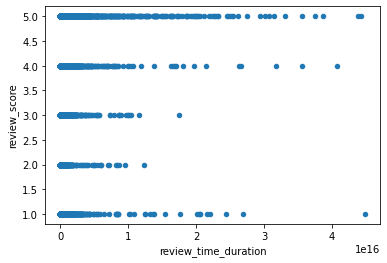

In [20]:
#to see whether there is a connection between review duration and review score

olist_order_reviews_dataset[['review_score', 'review_time_duration']
                           ].plot.scatter(x='review_time_duration', y='review_score');


In [21]:
es_comment_reviews = olist_order_reviews_dataset[['review_comment_title', 'review_comment_message']]

es_comment_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_title    11568 non-null  object
 1   review_comment_message  40977 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [22]:
es_comment_reviews.isnull().sum()

review_comment_title      87656
review_comment_message    58247
dtype: int64

In [23]:
es_comment_reviews = es_comment_reviews.dropna()

In [24]:
es_comment_reviews.isnull().sum()

review_comment_title      0
review_comment_message    0
dtype: int64

In [25]:
es_comment_reviews = es_comment_reviews.astype('str')
es_comment_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9839 entries, 9 to 99200
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_title    9839 non-null   object
 1   review_comment_message  9839 non-null   object
dtypes: object(2)
memory usage: 230.6+ KB


## Special EDA : Translating Portuguese

In [26]:
import translators as ts

Using state Kuala Lumpur server backend.


In [27]:
#testing the translator
phrase = 'otimo'
ts.google(phrase, from_language='pt', to_language='en')

'excellent'

In [28]:
es_comment_reviews['review_comment_title'].value_counts().head(10)
#some words are the same, only different case (upper vs lower)

Recomendo          354
recomendo          270
Bom                228
super recomendo    213
Excelente          203
Ótimo              193
Muito bom          192
Super recomendo    184
Ótimo              149
Otimo              133
Name: review_comment_title, dtype: int64

In [29]:
#changing all to lowercase

es_comment_reviews = es_comment_reviews.applymap(str.lower)
es_comment_reviews

,review_comment_title,review_comment_message
9,recomendo,aparelho eficiente. no site a marca do aparelh...
15,super recomendo,"vendedor confiável, produto ok e entrega antes..."
19,não chegou meu produto,péssimo
22,ótimo,loja nota 10
34,muito bom.,recebi exatamente o que esperava. as demais en...
...,...,...
99187,nota máxima!,"muito obrigado,\r\n\r\nexcelente atendimento,b..."
99192,👍,aprovado!
99196,muito bom produto,"ficamos muito satisfeitos com o produto, atend..."
99197,não foi entregue o pedido,bom dia \r\ndas 6 unidades compradas só recebi...


In [30]:
es_comment_reviews['review_comment_title'].value_counts().head(10)
#some words like otimo and ótimo are the same

recomendo          671
super recomendo    479
bom                315
muito bom          255
excelente          245
otimo              224
ótimo              224
ótimo              154
não recomendo      117
10                 115
Name: review_comment_title, dtype: int64

In [31]:
es_comment_reviews = es_comment_reviews.replace('ó', 'o', regex=True)
es_comment_reviews

,review_comment_title,review_comment_message
9,recomendo,aparelho eficiente. no site a marca do aparelh...
15,super recomendo,"vendedor confiável, produto ok e entrega antes..."
19,não chegou meu produto,péssimo
22,otimo,loja nota 10
34,muito bom.,recebi exatamente o que esperava. as demais en...
...,...,...
99187,nota máxima!,"muito obrigado,\r\n\r\nexcelente atendimento,b..."
99192,👍,aprovado!
99196,muito bom produto,"ficamos muito satisfeitos com o produto, atend..."
99197,não foi entregue o pedido,bom dia \r\ndas 6 unidades compradas so recebi...


In [32]:
es_comment_reviews = es_comment_reviews[es_comment_reviews.groupby('review_comment_title')['review_comment_title'].transform('size') > 200]
es_comment_reviews

,review_comment_title,review_comment_message
9,recomendo,aparelho eficiente. no site a marca do aparelh...
15,super recomendo,"vendedor confiável, produto ok e entrega antes..."
22,otimo,loja nota 10
36,bom,"recomendo ,"
108,otimo,ok recomendo
...,...,...
99105,muito bom,poderia ser excelente se o suporte não tivesse...
99109,super recomendo,otimo
99119,bom,produto veio conforme especificações.
99150,super recomendo,"produto lindo, entrega rápida e segura."


In [33]:
#only translating the first 50 rows
es_comment_reviews = es_comment_reviews.head(50)
es_comment_reviews

,review_comment_title,review_comment_message
9,recomendo,aparelho eficiente. no site a marca do aparelh...
15,super recomendo,"vendedor confiável, produto ok e entrega antes..."
22,otimo,loja nota 10
36,bom,"recomendo ,"
108,otimo,ok recomendo
191,super recomendo,chegou dentro do prazo e o produto é de excele...
201,recomendo,comecei a usar agora
279,super recomendo,produto de qualidade e eficiência na entrega. ...
298,otimo,entrega rapida
324,recomendo,tudo rápido e eficiente.


In [34]:
# #importing progress bar

# from tqdm.notebook import tqdm

In [35]:
#converting title to english
es_comment_reviews['en_review_comment_title'] = es_comment_reviews['review_comment_title'].apply(lambda x: ts.google(x, from_language='pt', to_language='en'))
es_comment_reviews

/var/folders/k3/rq3y45b92kbf6vtf128q_99r0000gn/T/ipykernel_5219/2577926469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  es_comment_reviews['en_review_comment_title'] = es_comment_reviews['review_comment_title'].apply(lambda x: ts.google(x, from_language='pt', to_language='en'))


,review_comment_title,review_comment_message,en_review_comment_title
9,recomendo,aparelho eficiente. no site a marca do aparelh...,I recommend
15,super recomendo,"vendedor confiável, produto ok e entrega antes...",super recommend
22,otimo,loja nota 10,excellent
36,bom,"recomendo ,",Good
108,otimo,ok recomendo,excellent
191,super recomendo,chegou dentro do prazo e o produto é de excele...,super recommend
201,recomendo,comecei a usar agora,I recommend
279,super recomendo,produto de qualidade e eficiência na entrega. ...,super recommend
298,otimo,entrega rapida,excellent
324,recomendo,tudo rápido e eficiente.,I recommend


### Observations:
1. There is no relationship between time duration and score
2. The review comment message may be useful for sentiment analysis (word cloud)
3. The sentiment can be correlated to review score
4. The review score can be related to other data such as items_id, seller, etc.

In [36]:
es_comment_reviews.shape

(50, 3)

# 4. Order Datasets

In [37]:
olist_orders_dataset = pd.read_csv('Sales/olist_orders_dataset.csv')
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [38]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [39]:
olist_orders_dataset = olist_orders_dataset.astype({
                                                    'order_purchase_timestamp':'datetime64',
                                                    'order_approved_at': 'datetime64',
                                                    'order_delivered_carrier_date': 'datetime64',
                                                    'order_delivered_customer_date': 'datetime64',
                                                    'order_estimated_delivery_date': 'datetime64',
                                                    
                                                    })
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [40]:
olist_orders_dataset.head(3).T

,0,1,2
order_id,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d
customer_id,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089
order_status,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2018-07-24 20:41:37,2018-08-08 08:38:49
order_approved_at,2017-10-02 11:07:15,2018-07-26 03:24:27,2018-08-08 08:55:23
order_delivered_carrier_date,2017-10-04 19:55:00,2018-07-26 14:31:00,2018-08-08 13:50:00
order_delivered_customer_date,2017-10-10 21:25:13,2018-08-07 15:27:45,2018-08-17 18:06:29
order_estimated_delivery_date,2017-10-18 00:00:00,2018-08-13 00:00:00,2018-09-04 00:00:00


# 5. Product Dataset

In [41]:
olist_product_dataset = pd.read_csv('Sales/olist_products_dataset.csv')
olist_product_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [42]:
olist_product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [43]:
olist_product_dataset.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

# 6. Seller Dataset

In [44]:
olist_seller_dataset = pd.read_csv('Sales/olist_sellers_dataset.csv')
olist_seller_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
olist_seller_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


# 7. MERGING DATASET


## 7.1. Merging `olist_orders_dataset` with `olist_customers_dataset` via `customer_id`

In [46]:
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [47]:
olist_cust_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [48]:
olist_cust_dataset.merge(olist_orders_dataset, on='customer_id').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [49]:
olist_cust_order_dataset = olist_cust_dataset.merge(olist_orders_dataset, on='customer_id')
olist_cust_order_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


## 7.2. Merging `olist_order_review` with `olist_cust_order_dataset` via `order_id`

In [50]:
olist_order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time_duration
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30,7 days 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42,2 days 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,1 days 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13,1 days 12:59:13


In [51]:
olist_cust_order_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [52]:
olist_cust_order_dataset.merge(olist_order_reviews_dataset, on='order_id', how='inner').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_id                    99224 non-null  object         
 1   customer_unique_id             99224 non-null  object         
 2   customer_zip_code_prefix       99224 non-null  int64          
 3   customer_city                  99224 non-null  object         
 4   customer_state                 99224 non-null  object         
 5   order_id                       99224 non-null  object         
 6   order_status                   99224 non-null  object         
 7   order_purchase_timestamp       99224 non-null  datetime64[ns] 
 8   order_approved_at              99068 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   97468 non-null  datetime64[ns] 
 10  order_delivered_customer_date  96359 non-null  datetime64[ns] 
 11  or

In [53]:
olist_cust_order_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [54]:
olist_cust_order_review_dataset = olist_cust_order_dataset.merge(olist_order_reviews_dataset, on='order_id')
olist_cust_order_review_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time_duration
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26,2017-05-30 22:34:40,4 days 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30,2018-02-10 22:43:29,11 days 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15,2018-06-15 12:10:59,0 days 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29,2018-04-02 18:36:47,4 days 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,7 days 01:59:52


## 7.3. Merging `olist_cust_order_review_dataset` with `olist_order_items_dataset` by `order_id`

In [55]:
olist_cust_order_review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_id                    99224 non-null  object         
 1   customer_unique_id             99224 non-null  object         
 2   customer_zip_code_prefix       99224 non-null  int64          
 3   customer_city                  99224 non-null  object         
 4   customer_state                 99224 non-null  object         
 5   order_id                       99224 non-null  object         
 6   order_status                   99224 non-null  object         
 7   order_purchase_timestamp       99224 non-null  datetime64[ns] 
 8   order_approved_at              99068 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   97468 non-null  datetime64[ns] 
 10  order_delivered_customer_date  96359 non-null  datetime64[ns] 
 11  or

In [56]:
olist_order_item_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int8          
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int8(1), object(3)
memory usage: 5.3+ MB


In [57]:
olist_cust_order_review_dataset.merge(olist_order_item_dataset, on='order_id').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    112372 non-null  object         
 1   customer_unique_id             112372 non-null  object         
 2   customer_zip_code_prefix       112372 non-null  int64          
 3   customer_city                  112372 non-null  object         
 4   customer_state                 112372 non-null  object         
 5   order_id                       112372 non-null  object         
 6   order_status                   112372 non-null  object         
 7   order_purchase_timestamp       112372 non-null  datetime64[ns] 
 8   order_approved_at              112357 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   111188 non-null  datetime64[ns] 
 10  order_delivered_customer_date  110012 non-null  datetime

In [58]:
olist_cust_order_review_item_dataset = olist_cust_order_review_dataset.merge(olist_order_item_dataset, on='order_id')
olist_cust_order_review_item_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    112372 non-null  object         
 1   customer_unique_id             112372 non-null  object         
 2   customer_zip_code_prefix       112372 non-null  int64          
 3   customer_city                  112372 non-null  object         
 4   customer_state                 112372 non-null  object         
 5   order_id                       112372 non-null  object         
 6   order_status                   112372 non-null  object         
 7   order_purchase_timestamp       112372 non-null  datetime64[ns] 
 8   order_approved_at              112357 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   111188 non-null  datetime64[ns] 
 10  order_delivered_customer_date  110012 non-null  datetime

## 7.4. Merging `olist_cust_order_review_item_dataset` with `olist_product_dataset` by `product_id`

In [59]:
olist_product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [60]:
olist_cust_order_review_item_product_dataset = olist_cust_order_review_item_dataset.merge(olist_product_dataset, on='product_id')
olist_cust_order_review_item_product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    112372 non-null  object         
 1   customer_unique_id             112372 non-null  object         
 2   customer_zip_code_prefix       112372 non-null  int64          
 3   customer_city                  112372 non-null  object         
 4   customer_state                 112372 non-null  object         
 5   order_id                       112372 non-null  object         
 6   order_status                   112372 non-null  object         
 7   order_purchase_timestamp       112372 non-null  datetime64[ns] 
 8   order_approved_at              112357 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   111188 non-null  datetime64[ns] 
 10  order_delivered_customer_date  110012 non-null  datetime

## 7.5. Merging `olist_cust_order_review_item_product_dataset` with `olist_seller_dataset` by `seller_id`

In [61]:
olist_seller_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [62]:
olist_cust_order_review_item_product_seller_dataset = olist_cust_order_review_item_product_dataset.merge(olist_seller_dataset, on='seller_id')
olist_cust_order_review_item_product_seller_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    112372 non-null  object         
 1   customer_unique_id             112372 non-null  object         
 2   customer_zip_code_prefix       112372 non-null  int64          
 3   customer_city                  112372 non-null  object         
 4   customer_state                 112372 non-null  object         
 5   order_id                       112372 non-null  object         
 6   order_status                   112372 non-null  object         
 7   order_purchase_timestamp       112372 non-null  datetime64[ns] 
 8   order_approved_at              112357 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   111188 non-null  datetime64[ns] 
 10  order_delivered_customer_date  110012 non-null  datetime

# 8. Final Merged Data

In [63]:
sales_raw = olist_cust_order_review_item_product_seller_dataset.copy()
sales_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    112372 non-null  object         
 1   customer_unique_id             112372 non-null  object         
 2   customer_zip_code_prefix       112372 non-null  int64          
 3   customer_city                  112372 non-null  object         
 4   customer_state                 112372 non-null  object         
 5   order_id                       112372 non-null  object         
 6   order_status                   112372 non-null  object         
 7   order_purchase_timestamp       112372 non-null  datetime64[ns] 
 8   order_approved_at              112357 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   111188 non-null  datetime64[ns] 
 10  order_delivered_customer_date  110012 non-null  datetime

## 8.1. Translating Languange

In [64]:
sales_raw.select_dtypes('object').head(3).T

,0,1,2
customer_id,06b8999e2fba1a1fbc88172c00ba8bc7,8912fc0c3bbf1e2fbf35819e21706718,8912fc0c3bbf1e2fbf35819e21706718
customer_unique_id,861eff4711a542e4b93843c6dd7febb0,9eae34bbd3a474ec5d07949ca7de67c0,9eae34bbd3a474ec5d07949ca7de67c0
customer_city,franca,santarem,santarem
customer_state,SP,PA,PA
order_id,00e7ee1b050b8499577073aeb2a297a1,c1d2b34febe9cd269e378117d6681172,c1d2b34febe9cd269e378117d6681172
order_status,delivered,delivered,delivered
review_id,88b8b52d46df026a9d1ad2136a59b30b,7fc63200f12eebb5f387856afdd63db8,7fc63200f12eebb5f387856afdd63db8
review_comment_title,NaN,NaN,NaN
review_comment_message,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...","GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT..."
product_id,a9516a079e37a9c9c36b9b78b10169e8,a9516a079e37a9c9c36b9b78b10169e8,a9516a079e37a9c9c36b9b78b10169e8


In [65]:
import translators as ts

In [66]:
ts.google('itaquaquecetuba', from_language='auto', to_language='en')

'Itaquaquecetuba'

In [67]:
#replacing '_' with space in column product category name

sales_raw.product_category_name = sales_raw.product_category_name.replace('_', ' ', regex=True)
sales_raw.product_category_name

0          moveis escritorio
1          moveis escritorio
2          moveis escritorio
3          moveis escritorio
4          moveis escritorio
                 ...        
112367            automotivo
112368              pet shop
112369       casa construcao
112370    ferramentas jardim
112371           eletronicos
Name: product_category_name, Length: 112372, dtype: object

In [68]:
#checking how many product category name there are

sales_raw.product_category_name.nunique()

73

In [69]:
# since there is only 73 types, let's make a list consists of 73 types

prod_list_pt = list(sales_raw['product_category_name'].unique())
prod_list_pt

['moveis escritorio',
 'moveis decoracao',
 'automotivo',
 'esporte lazer',
 'moveis sala',
 'bebes',
 'utilidades domesticas',
 'moveis cozinha area de servico jantar e jardim',
 'casa conforto',
 'cama mesa banho',
 'brinquedos',
 'casa conforto 2',
 'cool stuff',
 'informatica acessorios',
 'instrumentos musicais',
 'consoles games',
 'relogios presentes',
 nan,
 'beleza saude',
 'perfumaria',
 'casa construcao',
 'ferramentas jardim',
 'eletroportateis',
 'papelaria',
 'climatizacao',
 'telefonia',
 'construcao ferramentas construcao',
 'eletronicos',
 'pet shop',
 'telefonia fixa',
 'alimentos bebidas',
 'bebidas',
 'alimentos',
 'market place',
 'sinalizacao e seguranca',
 'fraldas higiene',
 'audio',
 'fashion bolsas e acessorios',
 'construcao ferramentas seguranca',
 'fashion roupa feminina',
 'malas acessorios',
 'fashion calcados',
 'artes',
 'livros interesse geral',
 'fashion roupa masculina',
 'musica',
 'dvds blu ray',
 'construcao ferramentas iluminacao',
 'artigos de n

In [70]:
#create a function to convert a phrase or sentences

def convert_to_en(phrase):
    return ts.google(phrase, from_language='auto', to_language='en')

In [71]:
# testing the function

phrase = prod_list_pt[6]

convert_to_en(phrase)

'domestic profits'

In [72]:
#converting all names in list and put it inside a new list
from tqdm.notebook import tqdm

prod_list_en = []

for name in tqdm(prod_list_pt):
    try:
        # print(f'{name}: {convert_pt_en(name)}')
        en_name = convert_to_en(name)  
        prod_list_en.append(en_name)
        
    except:
        'TranslatorError'
        
prod_list_en

  0%|          | 0/74 [00:00<?, ?it/s]

['Furniture office',
 'Furniture Decoration',
 'automotive',
 'sport leisure',
 'Room Furniture',
 'babies',
 'domestic profits',
 'Furniture Kitchen Service Area Dinner and Garden',
 'House comfort',
 'bed table bath',
 'toys',
 'House Comfort 2',
 'cool stuff',
 'computer accessories',
 'musical instruments',
 'consoles games',
 'Watches present',
 'HEALTH BEAUTY',
 'perfumery',
 'Casa Construcao',
 'Garden tools',
 'electrostile',
 'stationary store',
 'climatization',
 'telephony',
 'Construction Tools Construction',
 'electronics',
 'pet shop',
 'fixed telephony',
 'Drink foods',
 'drinks',
 'foods',
 'market place',
 'SIGNALIZATION AND SAFETY',
 'Hygiene diapers',
 'audio',
 'Fashion Bags and Accessories',
 'CONSTRUCTION SECURITY TOOLS',
 "Fashion Women's Clothing",
 'Bags Accessories',
 'Fashion Calcados',
 'artes',
 'General Interest Books',
 "Fashion Men's Clothing",
 'musica',
 'dvds blu ray',
 'Construction Tools Illumination',
 'Christmas articles',
 'party articles',
 'Con

In [73]:
#combing two lists into one dictionary

product_cat_name = dict(zip(prod_list_pt, prod_list_en))
product_cat_name

{'moveis escritorio': 'Furniture office',
 'moveis decoracao': 'Furniture Decoration',
 'automotivo': 'automotive',
 'esporte lazer': 'sport leisure',
 'moveis sala': 'Room Furniture',
 'bebes': 'babies',
 'utilidades domesticas': 'domestic profits',
 'moveis cozinha area de servico jantar e jardim': 'Furniture Kitchen Service Area Dinner and Garden',
 'casa conforto': 'House comfort',
 'cama mesa banho': 'bed table bath',
 'brinquedos': 'toys',
 'casa conforto 2': 'House Comfort 2',
 'cool stuff': 'cool stuff',
 'informatica acessorios': 'computer accessories',
 'instrumentos musicais': 'musical instruments',
 'consoles games': 'consoles games',
 'relogios presentes': 'Watches present',
 nan: 'HEALTH BEAUTY',
 'beleza saude': 'perfumery',
 'perfumaria': 'Casa Construcao',
 'casa construcao': 'Garden tools',
 'ferramentas jardim': 'electrostile',
 'eletroportateis': 'stationary store',
 'papelaria': 'climatization',
 'climatizacao': 'telephony',
 'telefonia': 'Construction Tools Constr

In [74]:
#replacing all product cat name in Sales dataset

sales_raw.product_category_name = sales_raw.product_category_name.replace(product_cat_name)
sales_raw.product_category_name = sales_raw.product_category_name.str.title()
sales_raw.product_category_name

0         Furniture Office
1         Furniture Office
2         Furniture Office
3         Furniture Office
4         Furniture Office
                ...       
112367          Automotive
112368     Fixed Telephony
112369        Garden Tools
112370        Electrostile
112371            Pet Shop
Name: product_category_name, Length: 112372, dtype: object

# 8.2. Parsing Dates to Year and Month

In [75]:
sales_raw_per_date = sales_raw.copy().set_index('order_delivered_customer_date')
sales_raw_per_date

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
order_delivered_customer_date,,,,,,,,,,,,,,,,,,,,,
2017-05-25 10:35:35,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2017-11-28 00:09:50,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2017-11-28 00:09:50,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2017-05-26 09:54:04,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2018-02-28 21:09:00,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,sao manuel,SP,d35703faec55cda0ceeb4f50a4d584ae,canceled,2018-07-16 22:08:56,2018-07-16 22:20:45,NaT,...,51.0,680.0,1.0,4150.0,68.0,12.0,68.0,9895,sao bernardo do campo,SP
2018-08-13 23:16:46,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,...,51.0,433.0,1.0,200.0,40.0,7.0,32.0,87015,maringa,PR
NaT,f0f671d4034e98cdf20f0c452d6db02b,6532316a8c1a7c7a569482db073530bb,7231,guarulhos,SP,f73b31435ce6dec43df056154c39a1ce,shipped,2018-08-20 12:37:54,2018-08-20 15:35:42,2018-08-24 16:48:00,...,42.0,2129.0,1.0,15008.0,47.0,31.0,51.0,9861,sbc,SP


In [76]:
sales_raw_per_date['year'] = sales_raw_per_date.index.year
sales_raw_per_date['month'] = sales_raw_per_date.index.month
sales_raw_per_date['daily'] = sales_raw_per_date.index.day_name()
sales_raw_per_date

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,year,month,daily
order_delivered_customer_date,,,,,,,,,,,,,,,,,,,,,
2017-05-25 10:35:35,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,2017.0,5.0,Thursday
2017-11-28 00:09:50,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,2017.0,11.0,Tuesday
2017-11-28 00:09:50,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,2017.0,11.0,Tuesday
2017-05-26 09:54:04,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,2017.0,5.0,Friday
2018-02-28 21:09:00,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,2018.0,2.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,sao manuel,SP,d35703faec55cda0ceeb4f50a4d584ae,canceled,2018-07-16 22:08:56,2018-07-16 22:20:45,NaT,...,4150.0,68.0,12.0,68.0,9895,sao bernardo do campo,SP,NaN,NaN,NaN
2018-08-13 23:16:46,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,...,200.0,40.0,7.0,32.0,87015,maringa,PR,2018.0,8.0,Monday
NaT,f0f671d4034e98cdf20f0c452d6db02b,6532316a8c1a7c7a569482db073530bb,7231,guarulhos,SP,f73b31435ce6dec43df056154c39a1ce,shipped,2018-08-20 12:37:54,2018-08-20 15:35:42,2018-08-24 16:48:00,...,15008.0,47.0,31.0,51.0,9861,sbc,SP,NaN,NaN,NaN


In [77]:
#percentage of nan data in the sales_raw

sales_raw_per_date.isna().sum()/len(sales_raw_per_date)*100

customer_id                       0.000000
customer_unique_id                0.000000
customer_zip_code_prefix          0.000000
customer_city                     0.000000
customer_state                    0.000000
order_id                          0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.013349
order_delivered_carrier_date      1.053643
order_estimated_delivery_date     0.000000
review_id                         0.000000
review_score                      0.000000
review_comment_title             88.045065
review_comment_message           57.603318
review_creation_date              0.000000
review_answer_timestamp           0.000000
review_time_duration              0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
freight_val

> Decided to dropna except for review_comment and title, as the total null data is negligible (about ten percent). This will also drop all order status except "delivered"

In [78]:
#initial data in order_status
sales_raw_per_date.order_status.value_counts()

delivered      110013
shipped          1110
canceled          529
invoiced          358
processing        352
unavailable         7
approved            3
Name: order_status, dtype: int64

In [79]:
list_to_drop = [
    'order_approved_at','order_delivered_carrier_date','product_name_lenght',
    'product_description_lenght', 'product_photos_qty','product_weight_g', 
    'product_length_cm', 'product_height_cm','product_width_cm', 'year','month',
]

list_to_drop

['order_approved_at',
 'order_delivered_carrier_date',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'year',
 'month']

In [80]:
sales_raw_per_date_cleaned = sales_raw_per_date.dropna(subset=list_to_drop)
sales_raw_per_date_cleaned.isna().sum()/len(sales_raw_per_date_cleaned)*100

customer_id                       0.000000
customer_unique_id                0.000000
customer_zip_code_prefix          0.000000
customer_city                     0.000000
customer_state                    0.000000
order_id                          0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.000000
order_delivered_carrier_date      0.000000
order_estimated_delivery_date     0.000000
review_id                         0.000000
review_score                      0.000000
review_comment_title             87.966403
review_comment_message           58.085246
review_creation_date              0.000000
review_answer_timestamp           0.000000
review_time_duration              0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
freight_val

In [81]:
sales_raw_per_date_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108463 entries, 2017-05-25 10:35:35 to 2017-12-19 19:37:33
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    108463 non-null  object         
 1   customer_unique_id             108463 non-null  object         
 2   customer_zip_code_prefix       108463 non-null  int64          
 3   customer_city                  108463 non-null  object         
 4   customer_state                 108463 non-null  object         
 5   order_id                       108463 non-null  object         
 6   order_status                   108463 non-null  object         
 7   order_purchase_timestamp       108463 non-null  datetime64[ns] 
 8   order_approved_at              108463 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   108463 non-null  datetime64[ns] 
 10  order_estimated_delive

In [82]:
sales_raw_per_date_cleaned = \
sales_raw_per_date_cleaned.astype(
    {
        'year': 'int32',
        'month': 'int8'
    }
)\
# .info()

sales_raw_per_date_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108463 entries, 2017-05-25 10:35:35 to 2017-12-19 19:37:33
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    108463 non-null  object         
 1   customer_unique_id             108463 non-null  object         
 2   customer_zip_code_prefix       108463 non-null  int64          
 3   customer_city                  108463 non-null  object         
 4   customer_state                 108463 non-null  object         
 5   order_id                       108463 non-null  object         
 6   order_status                   108463 non-null  object         
 7   order_purchase_timestamp       108463 non-null  datetime64[ns] 
 8   order_approved_at              108463 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   108463 non-null  datetime64[ns] 
 10  order_estimated_delive

## Final Dataset Sales

In [83]:
sales = sales_raw_per_date_cleaned.copy()

In [84]:
sales.tail(3).T

order_delivered_customer_date,2018-08-13 23:16:46,2018-08-28 18:16:44,2017-12-19 19:37:33
customer_id,eda10d7eb51a675d000956fa1aabc7dd,b90b857a277b080d8078332b3636ab58,1ed0c832c2dd99570a59260e71768bdf
customer_unique_id,5c22dbb9d8b5385953f2f1e6d9d115a7,7f5f43a9394964ac51bc5d1e0204ead4,82d46759af0369aad49084bacf85a6c3
customer_zip_code_prefix,39920,76400,37610
customer_city,jordania,uruacu,bom repouso
customer_state,MG,GO,MG
order_id,b494f624c631105b24fe497277085909,d76fe905f4588ad69ab3b36527bb267d,51c6d2f460589fa7b65f2da51e860206
order_status,delivered,delivered,delivered
order_purchase_timestamp,2018-08-01 18:58:49,2018-08-18 20:59:58,2017-11-14 12:04:09
order_approved_at,2018-08-02 18:50:15,2018-08-18 21:10:13,2017-11-14 12:15:25
order_delivered_carrier_date,2018-08-03 15:39:00,2018-08-20 16:49:00,2017-11-27 20:44:47


## 8.2. Sales EDA

### 8.2.1. What's the Most Bought Product Category?

In [85]:
sales\
.groupby(['product_category_name', 'order_status', 'order_item_id'])\
.product_category_name\
.count()\
.sort_values(ascending=False)

product_category_name                             order_status  order_item_id
Bed Table Bath                                    delivered     1                9186
Perfumery                                         delivered     1                8615
Sport Leisure                                     delivered     1                7494
Computer Accessories                              delivered     1                6519
Furniture Decoration                              delivered     1                6218
                                                                                 ... 
                                                                15                  1
Furniture Kitchen Service Area Dinner And Garden  delivered     5                   1
Furniture Office                                  delivered     11                  1
Kitchen Portable And Food Coach                   delivered     4                   1
Watches Present                                   delivered   

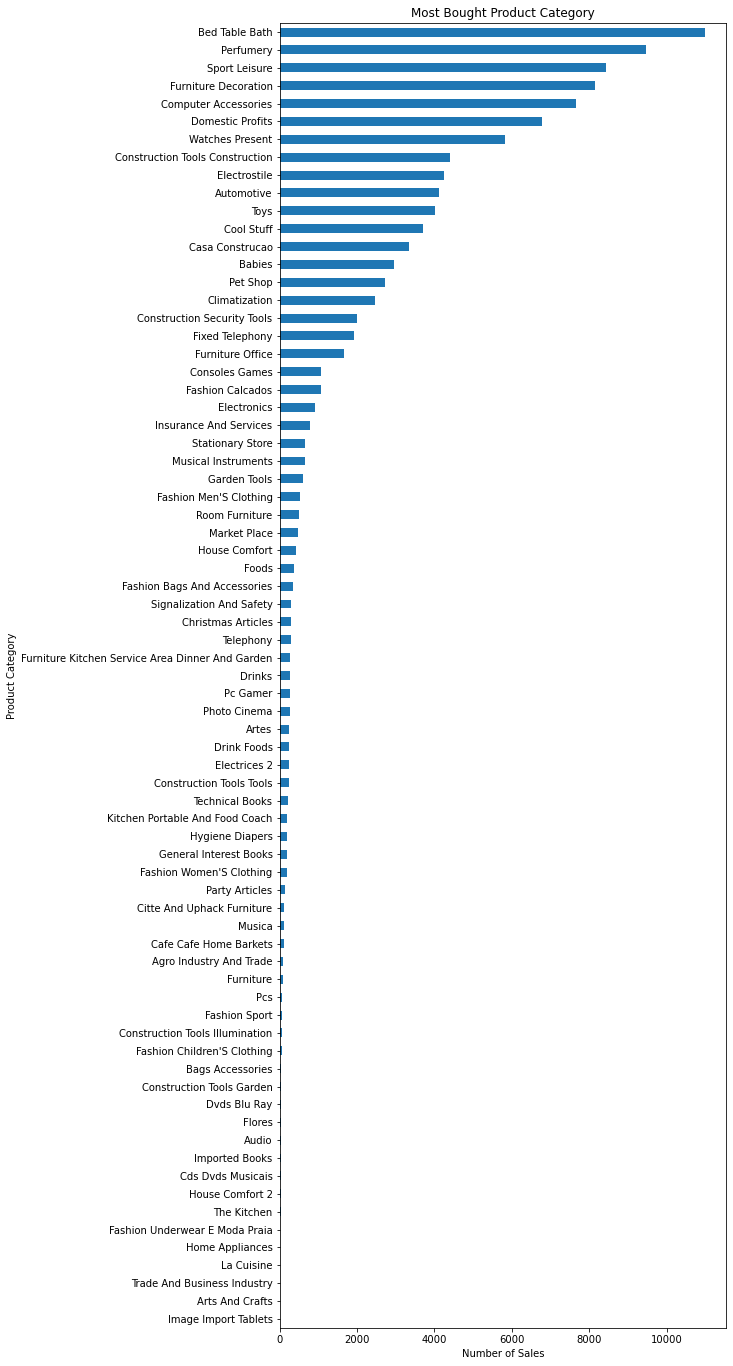

In [86]:
sales\
[sales['order_status'] == 'delivered']\
.groupby('product_category_name')['product_category_name']\
.count().sort_values(ascending=True)\
.plot(kind='barh', figsize=(8,24));

plt.xlabel('Number of Sales')
plt.ylabel('Product Category')

plt.title('Most Bought Product Category')

plt.show()

In [87]:
sales\
[sales['order_status'] == 'delivered']\
.groupby('product_category_name')['product_category_name']\
.count().sort_values(ascending=False)\
.head(10)

product_category_name
Bed Table Bath                     10984
Perfumery                           9456
Sport Leisure                       8433
Furniture Decoration                8155
Computer Accessories                7671
Domestic Profits                    6780
Watches Present                     5823
Construction Tools Construction     4406
Electrostile                        4253
Automotive                          4116
Name: product_category_name, dtype: int64

> The ten most bought product category are the above. The most bought product of all is bed table bath.


In [88]:
olist_cust_order_review_item_product_seller_dataset\
[olist_cust_order_review_item_product_seller_dataset['order_status'] == 'delivered']\
.groupby('product_category_name')['product_category_name']\
.count().sort_values(ascending=False)\
.head(10)

product_category_name
cama_mesa_banho           10985
beleza_saude               9456
esporte_lazer              8436
moveis_decoracao           8159
informatica_acessorios     7672
utilidades_domesticas      6780
relogios_presentes         5825
telefonia                  4408
ferramentas_jardim         4254
automotivo                 4117
Name: product_category_name, dtype: int64

## 9. Business Metrics - Sales

### 9.1. Total Sales

In [89]:
sales['order_status'].value_counts()

delivered    108456
canceled          7
Name: order_status, dtype: int64

> Total sales must be measured from "delivered" product, as unavailable product can also have order_item_id and price

In [90]:
sales = sales.query('order_status == "delivered"')
sales['order_status'].value_counts()

delivered    108456
Name: order_status, dtype: int64

In [91]:
sales['total_sales'] = sales.order_item_id*sales.price

#sanity check
sales[['order_item_id', 'order_id', 'product_id', 'price', 'total_sales']].query('order_item_id > 2 and price > 100').head(10)


,order_item_id,order_id,product_id,price,total_sales
order_delivered_customer_date,,,,,
2017-05-29 08:13:56,3,5ee63c8c9ae2e5c38791b35932cf4c69,a9516a079e37a9c9c36b9b78b10169e8,124.99,374.97
2017-05-29 08:13:56,4,5ee63c8c9ae2e5c38791b35932cf4c69,a9516a079e37a9c9c36b9b78b10169e8,124.99,499.96
2017-05-29 08:13:56,5,5ee63c8c9ae2e5c38791b35932cf4c69,a9516a079e37a9c9c36b9b78b10169e8,124.99,624.95
2017-05-29 08:13:56,6,5ee63c8c9ae2e5c38791b35932cf4c69,a9516a079e37a9c9c36b9b78b10169e8,124.99,749.94
2018-04-20 14:26:33,3,166029aa4dc1bed21f0d50ebdb4ef286,a9516a079e37a9c9c36b9b78b10169e8,116.99,350.97
2018-04-20 14:26:33,4,166029aa4dc1bed21f0d50ebdb4ef286,a9516a079e37a9c9c36b9b78b10169e8,116.99,467.96
2018-04-20 14:26:33,5,166029aa4dc1bed21f0d50ebdb4ef286,a9516a079e37a9c9c36b9b78b10169e8,116.99,584.95
2018-04-27 14:37:32,3,626434e11c37535d5f24e9d844249b55,a9516a079e37a9c9c36b9b78b10169e8,116.99,350.97
2017-08-04 17:04:20,3,a2a53e824841856d25e9fe22467e4209,a5647c44af977b148e0a3a4751a09e2e,169.94,509.82


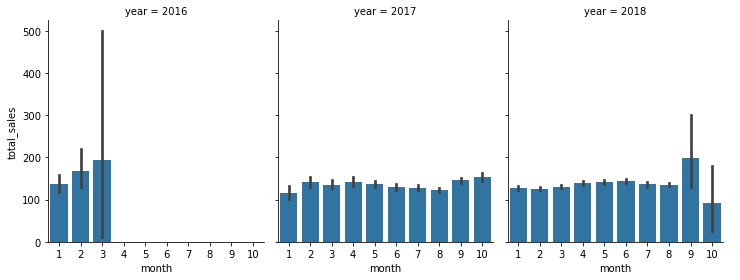

In [92]:
g = sns.FacetGrid(sales, col="year", height=4, aspect=0.85)
g.map_dataframe(sns.barplot, x="month", y="total_sales")
g.add_legend();

> Month-Month Basis, the sales is stable at around 150

## 9.2. Net Promotor Score

> Overall Review?

In [93]:
sales.review_score.value_counts(normalize=True, ascending=True)*100

2     3.358044
3     8.432913
1    11.371432
4    19.251125
5    57.586487
Name: review_score, dtype: float64

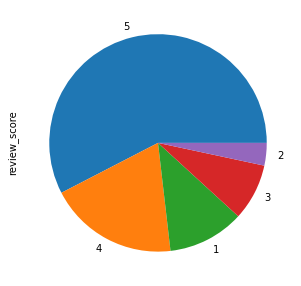

In [94]:
sales.review_score.value_counts(normalize=True).plot.pie(figsize=(8,5));

> Most of the sales are at good review (more than 50% is 5 star review)

## 9.3. Highest Sales Product

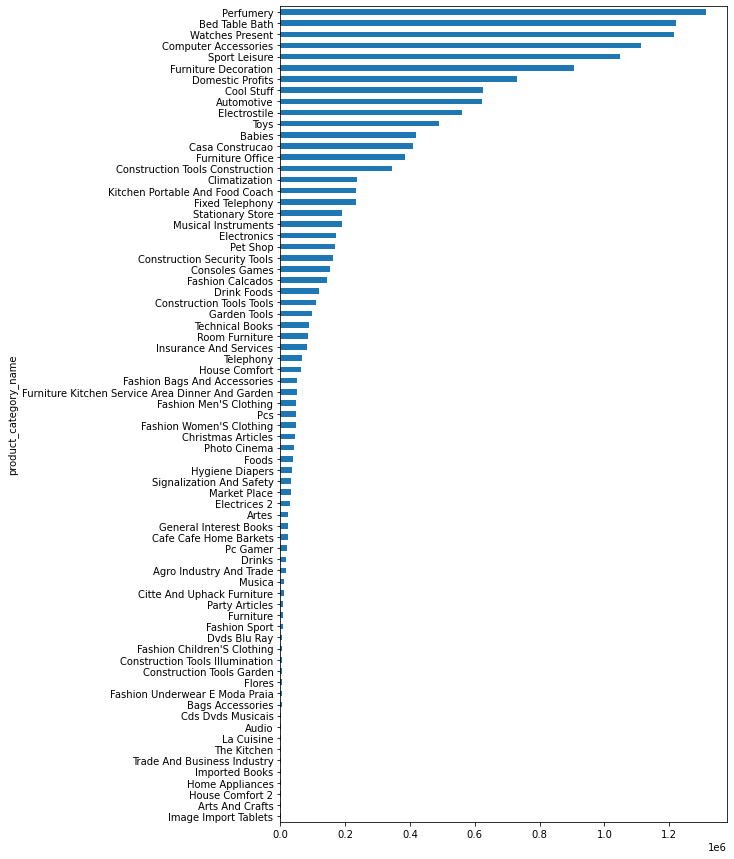

In [95]:
sales.groupby('product_category_name')\
.total_sales.sum()\
.sort_values(ascending=True)\
.plot.barh(figsize=(8,15));

In [96]:
sales.groupby('product_category_name')\
.total_sales.sum()\
.sort_values(ascending=False)\
.head(10)

product_category_name
Perfumery               1312490.65
Bed Table Bath          1222532.73
Watches Present         1214254.52
Computer Accessories    1113617.06
Sport Leisure           1046750.11
Furniture Decoration     905164.17
Domestic Profits         729757.09
Cool Stuff               625669.68
Automotive               622574.96
Electrostile             561912.65
Name: total_sales, dtype: float64

> Highest Total Sales is from Perfumery

## 9.4. Total Product Sell

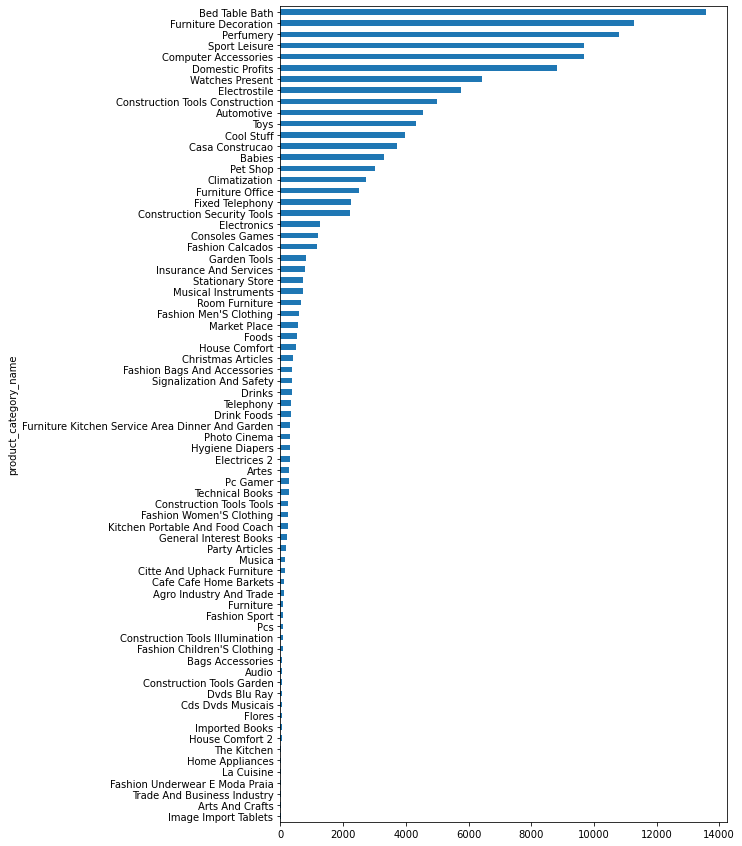

In [97]:
sales.groupby('product_category_name')\
.order_item_id.sum()\
.sort_values(ascending=True)\
.plot.barh(figsize=(8,15));

In [98]:
sales.groupby('product_category_name')\
.order_item_id.sum()\
.sort_values(ascending=False)\
.head(10)

product_category_name
Bed Table Bath                     13564.0
Furniture Decoration               11282.0
Perfumery                          10810.0
Sport Leisure                       9697.0
Computer Accessories                9690.0
Domestic Profits                    8813.0
Watches Present                     6418.0
Electrostile                        5752.0
Construction Tools Construction     5007.0
Automotive                          4554.0
Name: order_item_id, dtype: float64

> The highest bought product is Bed Table Bath

# 10. Business Metrics - Seller Achivement

estimated time arrival vs actual time arrived

In [99]:
sales.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,year,month,daily,total_sales
order_delivered_customer_date,,,,,,,,,,,,,,,,,,,,,
2017-05-25 10:35:35,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,2017,5,Thursday,124.99
2017-11-28 00:09:50,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,2017,11,Tuesday,112.99
2017-11-28 00:09:50,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,2017,11,Tuesday,225.98
2017-05-26 09:54:04,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,2017,5,Friday,124.99
2018-02-28 21:09:00,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,2018,2,Wednesday,106.99


In [100]:
sales['delivered_vs_est_date'] = sales.index-sales.order_estimated_delivery_date
sales

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,year,month,daily,total_sales,delivered_vs_est_date
order_delivered_customer_date,,,,,,,,,,,,,,,,,,,,,
2017-05-25 10:35:35,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577,itaquaquecetuba,SP,2017,5,Thursday,124.99,-11 days +10:35:35
2017-11-28 00:09:50,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,64.0,31.0,8577,itaquaquecetuba,SP,2017,11,Tuesday,112.99,-21 days +00:09:50
2017-11-28 00:09:50,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,64.0,31.0,8577,itaquaquecetuba,SP,2017,11,Tuesday,225.98,-21 days +00:09:50
2017-05-26 09:54:04,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,64.0,31.0,8577,itaquaquecetuba,SP,2017,5,Friday,124.99,-17 days +09:54:04
2018-02-28 21:09:00,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,64.0,31.0,8577,itaquaquecetuba,SP,2018,2,Wednesday,106.99,-22 days +21:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-28 22:08:29,502e8addaeba926b9c154da9f3bbbecf,38e482d7770a43f5929378c4dec76d5e,59151,parnamirim,RN,f80896ddec0878ff2475719a8784d53c,delivered,2018-08-16 15:02:31,2018-08-17 15:09:48,2018-08-20 13:22:00,...,10.0,15.0,24240,niteroi,RJ,2018,8,Tuesday,1750.00,-27 days +22:08:29
2018-07-27 11:54:15,59168d27c5da6a50e3d1f03d482e80b2,393c2ace23a135d0bcc7e70167448e16,47800,barreiras,BA,c382d84d35f4d874b1f1c372f4bde27c,delivered,2018-07-20 09:42:40,2018-07-20 15:05:22,2018-07-23 11:53:00,...,28.0,16.0,40285,salvador,BA,2018,7,Friday,145.90,-18 days +11:54:15
2018-08-13 23:16:46,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,...,7.0,32.0,87015,maringa,PR,2018,8,Monday,49.90,-14 days +23:16:46


In [101]:
sales['delivered_vs_est_days'] = sales['delivered_vs_est_date'].dt.days

In [102]:
sales['delivered_vs_est_days'].describe()

count    108456.000000
mean        -12.077266
std          10.083813
min        -147.000000
25%         -17.000000
50%         -13.000000
75%          -7.000000
max         188.000000
Name: delivered_vs_est_days, dtype: float64

In [103]:
sales[[
    'order_estimated_delivery_date', 'delivered_vs_est_date', 
    'delivered_vs_est_days', 'customer_city', 'seller_city']]\
.sort_values(by='delivered_vs_est_date', ascending=True)

,order_estimated_delivery_date,delivered_vs_est_date,delivered_vs_est_days,customer_city,seller_city
order_delivered_customer_date,,,,,
2018-03-09 23:36:47,2018-08-03,-147 days +23:36:47,-147,sumare,sao paulo
2018-03-09 23:36:47,2018-08-03,-147 days +23:36:47,-147,sumare,sao paulo
2017-02-14 14:27:45,2017-07-04,-140 days +14:27:45,-140,sao luis,sao paulo
2018-02-27 16:35:43,2018-07-12,-135 days +16:35:43,-135,sao gabriel,sao paulo
2017-06-09 13:35:54,2017-10-11,-124 days +13:35:54,-124,sao jose do rio preto,jacutinga
...,...,...,...,...,...
2017-09-19 15:12:50,2017-04-07,165 days 15:12:50,165,belem,belo horizonte
2017-09-19 14:00:04,2017-04-06,166 days 14:00:04,166,lagarto,uberaba
2017-09-19 17:00:07,2017-04-05,167 days 17:00:07,167,paulinia,farroupilha


#### A Negative value means earlier than estimated date, positive means latter than the estimated date.
> Negative is `good`, Positive is `bad`

In [104]:
# customer city is the same with seller city

sales[[
    'order_estimated_delivery_date', 'delivered_vs_est_date', 
    'delivered_vs_est_days', 'customer_city', 'seller_city']]\
.sort_values(by='delivered_vs_est_date').query('customer_city != seller_city').describe()

,delivered_vs_est_date,delivered_vs_est_days
count,102818,102818.000000
mean,-12 days +11:21:37.737750200,-12.224309
std,10 days 04:46:47.811370843,10.196712
min,-147 days +23:36:47,-147.000000
25%,-17 days +11:58:51,-17.000000
50%,-13 days +19:57:57,-13.000000
75%,-8 days +23:20:36,-8.000000
max,188 days 23:24:07,188.000000


In [105]:
# customer city is different with seller city

sales[[
    'order_estimated_delivery_date', 'delivered_vs_est_date', 
    'delivered_vs_est_days', 'customer_city', 'seller_city']]\
.sort_values(by='delivered_vs_est_date').query('customer_city == seller_city').describe()

,delivered_vs_est_date,delivered_vs_est_days
count,5638,5638.000000
mean,-9 days +07:04:37.171514722,-9.395708
std,7 days 05:46:19.561081953,7.235492
min,-61 days +03:53:46,-61.000000
25%,-13 days +18:44:00.250000,-13.000000
50%,-9 days +18:23:55,-9.000000
75%,-6 days +19:27:08.500000,-6.000000
max,104 days 13:38:16,104.000000


> It seems like the farther the customer and seller city is, the longer the delivery time/ days. As expected. This can be easily check using geospatial analysis in Tableau

In [106]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108456 entries, 2017-05-25 10:35:35 to 2017-12-19 19:37:33
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    108456 non-null  object         
 1   customer_unique_id             108456 non-null  object         
 2   customer_zip_code_prefix       108456 non-null  int64          
 3   customer_city                  108456 non-null  object         
 4   customer_state                 108456 non-null  object         
 5   order_id                       108456 non-null  object         
 6   order_status                   108456 non-null  object         
 7   order_purchase_timestamp       108456 non-null  datetime64[ns] 
 8   order_approved_at              108456 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   108456 non-null  datetime64[ns] 
 10  order_estimated_delive

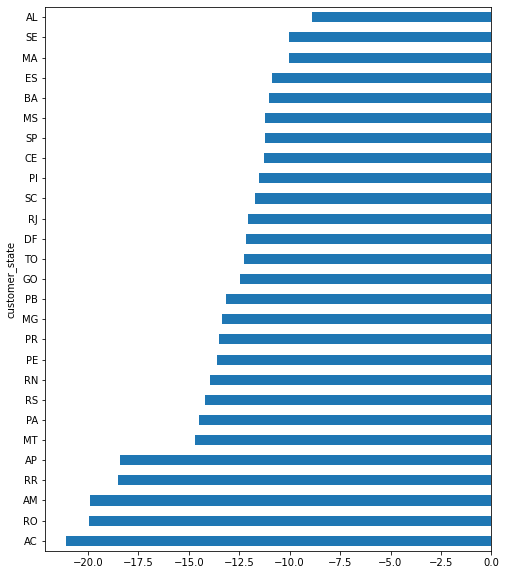

In [107]:
sales.groupby('customer_state')\
.delivered_vs_est_days.mean()\
.sort_values(ascending=True)\
.plot.barh(figsize=(8,10));

In [108]:
sales.groupby('customer_state')\
.delivered_vs_est_days.mean()\
.sort_values(ascending=True)

customer_state
AC   -21.078652
RO   -19.936090
AM   -19.906832
RR   -18.500000
AP   -18.412500
MT   -14.695481
PA   -14.475073
RS   -14.178430
RN   -13.939689
PE   -13.580082
PR   -13.510860
MG   -13.376484
PB   -13.148601
GO   -12.466274
TO   -12.242623
DF   -12.162950
RJ   -12.052521
SC   -11.706322
PI   -11.523438
CE   -11.267946
SP   -11.236407
MS   -11.203202
BA   -11.050111
ES   -10.855053
MA   -10.032953
SE   -10.018868
AL    -8.900943
Name: delivered_vs_est_days, dtype: float64

> AC has the fastest delivery time (earlier by 21 days on average), and AL has the slowest delivery time (earlier by only 8 days).

In [109]:
sales.groupby('seller_state')\
.delivered_vs_est_days.mean()\
.sort_values(ascending=True)

seller_state
RO   -24.500000
PB   -19.818182
MS   -18.000000
SE   -17.300000
RS   -16.313948
PE   -16.264108
MT   -15.631944
PI   -15.000000
GO   -14.326653
PR   -14.243550
SC   -14.240927
ES   -13.633523
MG   -13.563925
RN   -13.482143
CE   -13.377778
DF   -13.123570
BA   -12.868590
RJ   -12.526844
MA   -11.416667
PA   -11.375000
SP   -11.347165
AM     9.000000
Name: delivered_vs_est_days, dtype: float64

> AM actually has the positive value, meaning that product delivered later than estimated. At around 9 days on average. However, the data from this state is only three, meaning that perhaps the result is biased. See below

In [110]:
sales.seller_state.value_counts()

SP    77358
PR     8450
MG     8377
RJ     4582
SC     3968
RS     2115
DF      874
BA      624
GO      499
PE      443
MA      396
ES      352
MT      144
CE       90
RN       56
MS       49
PB       33
RO       14
PI       11
SE       10
PA        8
AM        3
Name: seller_state, dtype: int64

In [1002]:
sales.to_csv('sales.csv', index=False)

# 10. Business Metrics - Marketing

## 10.1. Data Cleaning

In [864]:
marketing = pd.read_excel('marketing_data.xlsx')
marketing.head().T

,0,1,2,3,4
ID,1826,1,10476,1386,5371
Year_Birth,1970,1961,1958,1967,1989
Education,Graduation,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Single,Married,Together,Single
Income,"$84,835.00","$57,091.00","$67,267.00","$32,474.00","$21,474.00"
Dt_Customer,6/16/14,6/15/14,5/13/14,5/11/14,4/8/14
Recency,0,0,0,0,0
MntWines,189,464,134,10,6
MntFruits,104,5,11,0,16
MntMeatProducts,379,64,59,1,24


In [865]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Education          2240 non-null   object
 3   Marital_Status     2240 non-null   object
 4    Income            2216 non-null   object
 5   Dt_Customer        2240 non-null   object
 6   Recency            2240 non-null   int64 
 7   MntWines           2240 non-null   int64 
 8   MntFruits          2240 non-null   int64 
 9   MntMeatProducts    2240 non-null   int64 
 10  MntFishProducts    2240 non-null   int64 
 11  NumWebPurchases    2240 non-null   int64 
 12  NumWebVisitsMonth  2240 non-null   int64 
 13  AcceptedCmp3       2240 non-null   int64 
 14  AcceptedCmp4       2240 non-null   int64 
 15  AcceptedCmp5       2240 non-null   int64 
 16  AcceptedCmp1       2240 non-null   int64 


In [866]:
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'NumWebPurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'],
      dtype='object')

In [867]:
# renaming Income column

marketing.rename(columns={' Income ': 'Income'}, inplace=True)

In [868]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Education          2240 non-null   object
 3   Marital_Status     2240 non-null   object
 4   Income             2216 non-null   object
 5   Dt_Customer        2240 non-null   object
 6   Recency            2240 non-null   int64 
 7   MntWines           2240 non-null   int64 
 8   MntFruits          2240 non-null   int64 
 9   MntMeatProducts    2240 non-null   int64 
 10  MntFishProducts    2240 non-null   int64 
 11  NumWebPurchases    2240 non-null   int64 
 12  NumWebVisitsMonth  2240 non-null   int64 
 13  AcceptedCmp3       2240 non-null   int64 
 14  AcceptedCmp4       2240 non-null   int64 
 15  AcceptedCmp5       2240 non-null   int64 
 16  AcceptedCmp1       2240 non-null   int64 


In [869]:
marketing['Income'] = marketing['Income'].replace('\$|,', '', regex=True).astype('float')
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,1826,1970,Graduation,Divorced,84835.0,6/16/14,0,189,104,379,111,4,1,0,0,0,0,0
1,1,1961,Graduation,Single,57091.0,6/15/14,0,464,5,64,7,7,5,0,0,0,0,1
2,10476,1958,Graduation,Married,67267.0,5/13/14,0,134,11,59,15,3,2,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,5/11/14,0,10,0,1,0,1,7,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.0,4/8/14,0,6,16,24,11,3,7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,3/7/13,99,372,18,126,47,5,4,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1/22/13,99,5,10,13,3,1,8,0,0,0,0,0
2237,22,1976,Graduation,Divorced,46310.0,12/3/12,99,185,2,88,15,6,8,0,0,0,0,0
2238,528,1978,Graduation,Married,65819.0,11/29/12,99,267,38,701,149,5,3,0,0,0,0,0


In [870]:
marketing.Dt_Customer = marketing.Dt_Customer.astype('datetime64')
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2240 non-null   int64         
 1   Year_Birth         2240 non-null   int64         
 2   Education          2240 non-null   object        
 3   Marital_Status     2240 non-null   object        
 4   Income             2216 non-null   float64       
 5   Dt_Customer        2240 non-null   datetime64[ns]
 6   Recency            2240 non-null   int64         
 7   MntWines           2240 non-null   int64         
 8   MntFruits          2240 non-null   int64         
 9   MntMeatProducts    2240 non-null   int64         
 10  MntFishProducts    2240 non-null   int64         
 11  NumWebPurchases    2240 non-null   int64         
 12  NumWebVisitsMonth  2240 non-null   int64         
 13  AcceptedCmp3       2240 non-null   int64         
 14  Accepted

In [871]:
marketing = marketing.dropna()
#dropping 24 entry data

In [872]:
marketing.isna().sum()

ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
NumWebPurchases      0
NumWebVisitsMonth    0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
AcceptedCmp1         0
AcceptedCmp2         0
dtype: int64

## 10.2. Churn Rate -- UNFINISHED

1. Determine a time period: monthly, annual, or quarterly.
1. Determine the number of customers you had at the beginning of the time period.
1. Determine the number of customers that churned by the end of the time period.
1. Divide the number of lost customers by the number of customers you had prior to the churn.
1. Multiply that number by 100.


As an example, let's say your software company had 500 customers at the beginning of last quarter.

However, you also lost 50 customers due to expired contracts and a few poor customer service interactions.

This would mean your quarter's customer churn rate would be the 50 churned customers divided by the 500 former customers, and 50 divided by 500 is 0.10.

Multiplied by 100, this gives you a customer churn rate of 10%.

Here's how it looks when you do the math out:

Customer Churn Rate = (Lost Customers ÷ Total Customers at the Start of Time Period) x 100
Customer Churn Rate = (50 ÷ 500) x 100
Customer Churn Rate = (0.10) x 100
Customer Churn Rate = 10%

In [873]:
# setting index to Dt_Customer

marketing_date = marketing.copy().set_index('Dt_Customer')
marketing_date


,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
Dt_Customer,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Graduation,Divorced,84835.0,0,189,104,379,111,4,1,0,0,0,0,0
2014-06-15,1,1961,Graduation,Single,57091.0,0,464,5,64,7,7,5,0,0,0,0,1
2014-05-13,10476,1958,Graduation,Married,67267.0,0,134,11,59,15,3,2,0,0,0,0,0
2014-05-11,1386,1967,Graduation,Together,32474.0,0,10,0,1,0,1,7,0,0,0,0,0
2014-04-08,5371,1989,Graduation,Single,21474.0,0,6,16,24,11,3,7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-07,10142,1976,PhD,Divorced,66476.0,99,372,18,126,47,5,4,0,0,0,0,0
2013-01-22,5263,1977,2n Cycle,Married,31056.0,99,5,10,13,3,1,8,0,0,0,0,0
2012-12-03,22,1976,Graduation,Divorced,46310.0,99,185,2,88,15,6,8,0,0,0,0,0


In [874]:
# Determine a time period: monthly, annual, or quarterly.

marketing_date['year'] = marketing_date.index.year
marketing_date['month'] = marketing_date.index.month
marketing_date['week'] = marketing_date.index.week
marketing_date['day'] = marketing_date.index.day_name()
marketing_date


/var/folders/k3/rq3y45b92kbf6vtf128q_99r0000gn/T/ipykernel_5219/575678042.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  marketing_date['week'] = marketing_date.index.week


,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,year,month,week,day
Dt_Customer,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Graduation,Divorced,84835.0,0,189,104,379,111,...,1,0,0,0,0,0,2014,6,25,Monday
2014-06-15,1,1961,Graduation,Single,57091.0,0,464,5,64,7,...,5,0,0,0,0,1,2014,6,24,Sunday
2014-05-13,10476,1958,Graduation,Married,67267.0,0,134,11,59,15,...,2,0,0,0,0,0,2014,5,20,Tuesday
2014-05-11,1386,1967,Graduation,Together,32474.0,0,10,0,1,0,...,7,0,0,0,0,0,2014,5,19,Sunday
2014-04-08,5371,1989,Graduation,Single,21474.0,0,6,16,24,11,...,7,1,0,0,0,0,2014,4,15,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-07,10142,1976,PhD,Divorced,66476.0,99,372,18,126,47,...,4,0,0,0,0,0,2013,3,10,Thursday
2013-01-22,5263,1977,2n Cycle,Married,31056.0,99,5,10,13,3,...,8,0,0,0,0,0,2013,1,4,Tuesday
2012-12-03,22,1976,Graduation,Divorced,46310.0,99,185,2,88,15,...,8,0,0,0,0,0,2012,12,49,Monday


In [875]:
marketing_date = marketing_date.astype({'ID':'str'})
marketing_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2014-06-16 to 2012-09-01
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2216 non-null   object 
 1   Year_Birth         2216 non-null   int64  
 2   Education          2216 non-null   object 
 3   Marital_Status     2216 non-null   object 
 4   Income             2216 non-null   float64
 5   Recency            2216 non-null   int64  
 6   MntWines           2216 non-null   int64  
 7   MntFruits          2216 non-null   int64  
 8   MntMeatProducts    2216 non-null   int64  
 9   MntFishProducts    2216 non-null   int64  
 10  NumWebPurchases    2216 non-null   int64  
 11  NumWebVisitsMonth  2216 non-null   int64  
 12  AcceptedCmp3       2216 non-null   int64  
 13  AcceptedCmp4       2216 non-null   int64  
 14  AcceptedCmp5       2216 non-null   int64  
 15  AcceptedCmp1       2216 non-null   int64  
 16  Accept

In [876]:
# Determine the number of customers you had at the beginning of the time period. Total customer = 2216

marketing_date.ID.nunique()

2216

In [877]:
marketing_date.loc['2013': '2014'].groupby('month').count()


,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,year,week,day
month,,,,,,,,,,,,,,,,,,,,
1,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
2,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177
3,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
4,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
5,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
6,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163
7,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98
8,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
9,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94


In [878]:
marketing_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2014-06-16 to 2012-09-01
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2216 non-null   object 
 1   Year_Birth         2216 non-null   int64  
 2   Education          2216 non-null   object 
 3   Marital_Status     2216 non-null   object 
 4   Income             2216 non-null   float64
 5   Recency            2216 non-null   int64  
 6   MntWines           2216 non-null   int64  
 7   MntFruits          2216 non-null   int64  
 8   MntMeatProducts    2216 non-null   int64  
 9   MntFishProducts    2216 non-null   int64  
 10  NumWebPurchases    2216 non-null   int64  
 11  NumWebVisitsMonth  2216 non-null   int64  
 12  AcceptedCmp3       2216 non-null   int64  
 13  AcceptedCmp4       2216 non-null   int64  
 14  AcceptedCmp5       2216 non-null   int64  
 15  AcceptedCmp1       2216 non-null   int64  
 16  Accept

In [879]:
marketing_date.year.value_counts()


2013    1173
2014     553
2012     490
Name: year, dtype: int64

In [880]:
#churn grouping

bins= [0,45,100]

labels = ['no','yes']
marketing_date['churn_45d'] = pd.cut(marketing_date['Recency'], bins=bins, labels=labels)

    
# marketing_date = marketing_date.astype({'age_group': 'object'})    
marketing_date

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,year,month,week,day,churn_45d
Dt_Customer,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Graduation,Divorced,84835.0,0,189,104,379,111,...,0,0,0,0,0,2014,6,25,Monday,NaN
2014-06-15,1,1961,Graduation,Single,57091.0,0,464,5,64,7,...,0,0,0,0,1,2014,6,24,Sunday,NaN
2014-05-13,10476,1958,Graduation,Married,67267.0,0,134,11,59,15,...,0,0,0,0,0,2014,5,20,Tuesday,NaN
2014-05-11,1386,1967,Graduation,Together,32474.0,0,10,0,1,0,...,0,0,0,0,0,2014,5,19,Sunday,NaN
2014-04-08,5371,1989,Graduation,Single,21474.0,0,6,16,24,11,...,1,0,0,0,0,2014,4,15,Tuesday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-07,10142,1976,PhD,Divorced,66476.0,99,372,18,126,47,...,0,0,0,0,0,2013,3,10,Thursday,yes
2013-01-22,5263,1977,2n Cycle,Married,31056.0,99,5,10,13,3,...,0,0,0,0,0,2013,1,4,Tuesday,yes
2012-12-03,22,1976,Graduation,Divorced,46310.0,99,185,2,88,15,...,0,0,0,0,0,2012,12,49,Monday,yes


In [881]:
marketing_date.churn_45d.value_counts()/len(marketing_date)

yes    0.546029
no     0.441336
Name: churn_45d, dtype: float64

<AxesSubplot:xlabel='year,month'>

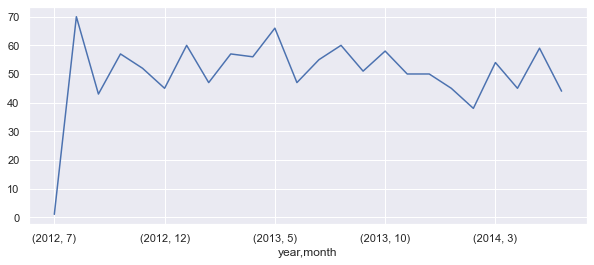

In [882]:
marketing_date.query('churn_45d == "yes"').groupby(['year','month'])['churn_45d'].count().plot(figsize=(10,4))

<AxesSubplot:xlabel='year,month'>

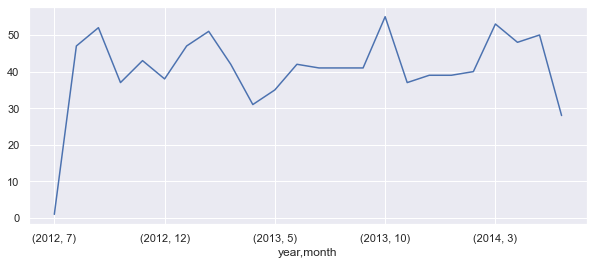

In [883]:
marketing_date.query('churn_45d == "no"').groupby(['year', 'month'])['churn_45d'].count().plot(figsize=(10,4))

## 10.2. RFM Conversion Rate

In [884]:
# calculating the age

# marketing_date['age'] = \
marketing_date['age'] = marketing_date['year']-marketing_date['Year_Birth']
marketing_date

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,year,month,week,day,churn_45d,age
Dt_Customer,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Graduation,Divorced,84835.0,0,189,104,379,111,...,0,0,0,0,2014,6,25,Monday,NaN,44
2014-06-15,1,1961,Graduation,Single,57091.0,0,464,5,64,7,...,0,0,0,1,2014,6,24,Sunday,NaN,53
2014-05-13,10476,1958,Graduation,Married,67267.0,0,134,11,59,15,...,0,0,0,0,2014,5,20,Tuesday,NaN,56
2014-05-11,1386,1967,Graduation,Together,32474.0,0,10,0,1,0,...,0,0,0,0,2014,5,19,Sunday,NaN,47
2014-04-08,5371,1989,Graduation,Single,21474.0,0,6,16,24,11,...,0,0,0,0,2014,4,15,Tuesday,NaN,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-07,10142,1976,PhD,Divorced,66476.0,99,372,18,126,47,...,0,0,0,0,2013,3,10,Thursday,yes,37
2013-01-22,5263,1977,2n Cycle,Married,31056.0,99,5,10,13,3,...,0,0,0,0,2013,1,4,Tuesday,yes,36
2012-12-03,22,1976,Graduation,Divorced,46310.0,99,185,2,88,15,...,0,0,0,0,2012,12,49,Monday,yes,36


<AxesSubplot:ylabel='Frequency'>

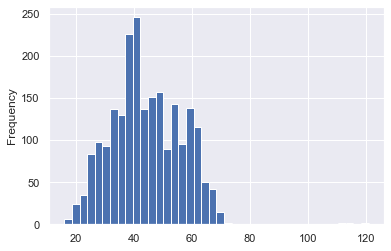

In [885]:
marketing_date.age.plot.hist(bins=40)

# marketing_date.age.plot.box()


> There is an outlier with more than 100 years old

In [886]:
marketing_date.query('age > 80').T

#only three data contains outlier

Dt_Customer,2014-05-17,2013-09-26,2013-09-26
ID,11004,1150,7829
Year_Birth,1893,1899,1900
Education,2n Cycle,PhD,2n Cycle
Marital_Status,Single,Together,Divorced
Income,60182.0,83532.0,36640.0
Recency,23,36,99
MntWines,8,755,15
MntFruits,0,144,6
MntMeatProducts,5,562,8
MntFishProducts,7,104,7


- The Silent Generation: Born 1928-1945 (76-93 years old)
- Baby Boomers: Born 1946-1964 (57-75 years old)
- Generation X: Born 1965-1980 (41-56 years old)
- Millennials: Born 1981-1996 (25-40 years old)
- Generation Z: Born 1997-2012 (9-24 years old)
- Generation Alpha: Born 2010-2025 (0-11 years old)

In [887]:
#age grouping

bins= [11,24,40,56,75]
# bins = pd.IntervalIndex.from_tuples([(0, 10), (11, 24), (25, 40), (41, 56), (57, 75), (76, 93)])
labels = ['Gen_Z','Millennials','Gen_X','Baby_Boomers']
marketing_date['age_group'] = pd.cut(marketing_date['age'], bins=bins, labels=labels)

    
# marketing_date = marketing_date.astype({'age_group': 'object'})    
marketing_date

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,year,month,week,day,churn_45d,age,age_group
Dt_Customer,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Graduation,Divorced,84835.0,0,189,104,379,111,...,0,0,0,2014,6,25,Monday,NaN,44,Gen_X
2014-06-15,1,1961,Graduation,Single,57091.0,0,464,5,64,7,...,0,0,1,2014,6,24,Sunday,NaN,53,Gen_X
2014-05-13,10476,1958,Graduation,Married,67267.0,0,134,11,59,15,...,0,0,0,2014,5,20,Tuesday,NaN,56,Gen_X
2014-05-11,1386,1967,Graduation,Together,32474.0,0,10,0,1,0,...,0,0,0,2014,5,19,Sunday,NaN,47,Gen_X
2014-04-08,5371,1989,Graduation,Single,21474.0,0,6,16,24,11,...,0,0,0,2014,4,15,Tuesday,NaN,25,Millennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-07,10142,1976,PhD,Divorced,66476.0,99,372,18,126,47,...,0,0,0,2013,3,10,Thursday,yes,37,Millennials
2013-01-22,5263,1977,2n Cycle,Married,31056.0,99,5,10,13,3,...,0,0,0,2013,1,4,Tuesday,yes,36,Millennials
2012-12-03,22,1976,Graduation,Divorced,46310.0,99,185,2,88,15,...,0,0,0,2012,12,49,Monday,yes,36,Millennials


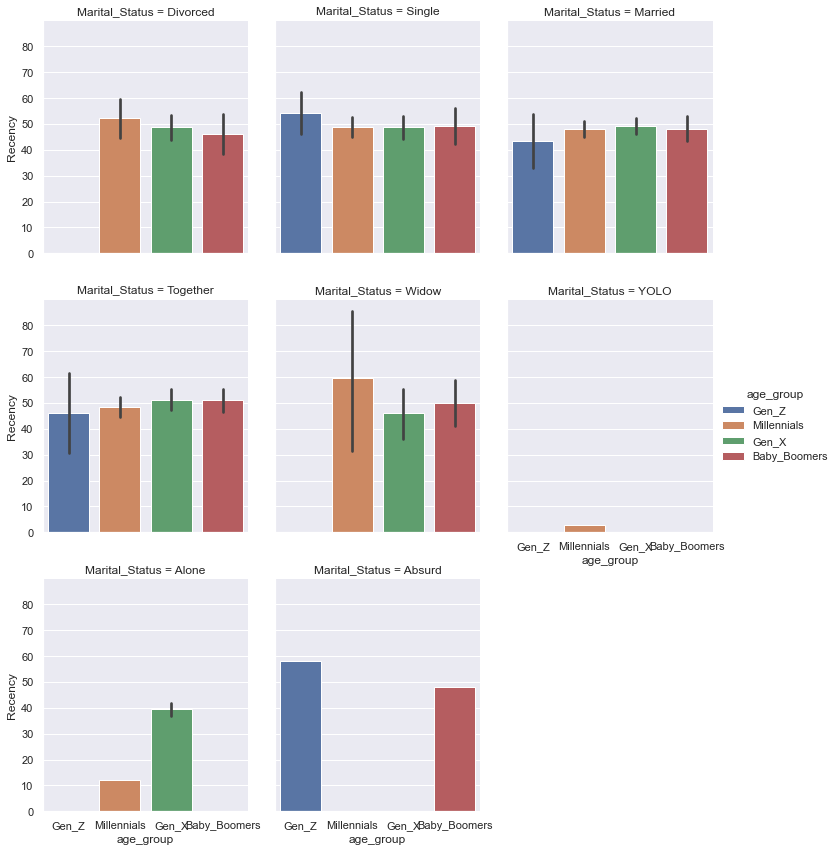

In [888]:
#Recency vs Age Group, Separated by Marital Status

sns.set_theme()

g = sns.FacetGrid(
    marketing_date, 
    col="Marital_Status", 
    # row='Education',
    hue='age_group',
    height=4, aspect=0.85,
    col_wrap=3,
    # sharey=False
)
g.map_dataframe(sns.barplot, x="age_group", y='Recency')
# g.set(ylim=(0, 150000))
g.add_legend();

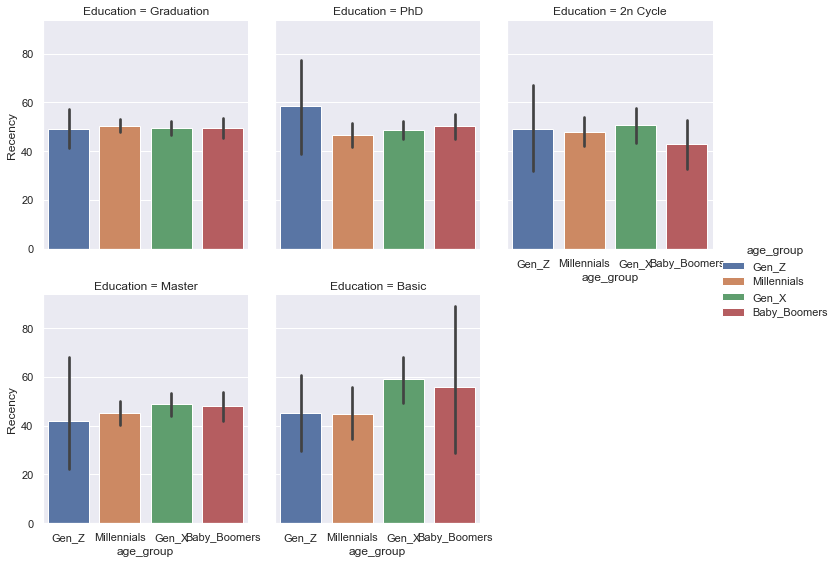

In [889]:
#Recency vs Age Group, Separated by Education
g = sns.FacetGrid(
    marketing_date, 
    col="Education", 
    # row='Education',
    hue='age_group',
    height=4, aspect=0.85,
    col_wrap=3,
    # sharey=False
)
g.map_dataframe(sns.barplot, x="age_group", y='Recency')
# g.set(ylim=(0, 150000))
g.add_legend();

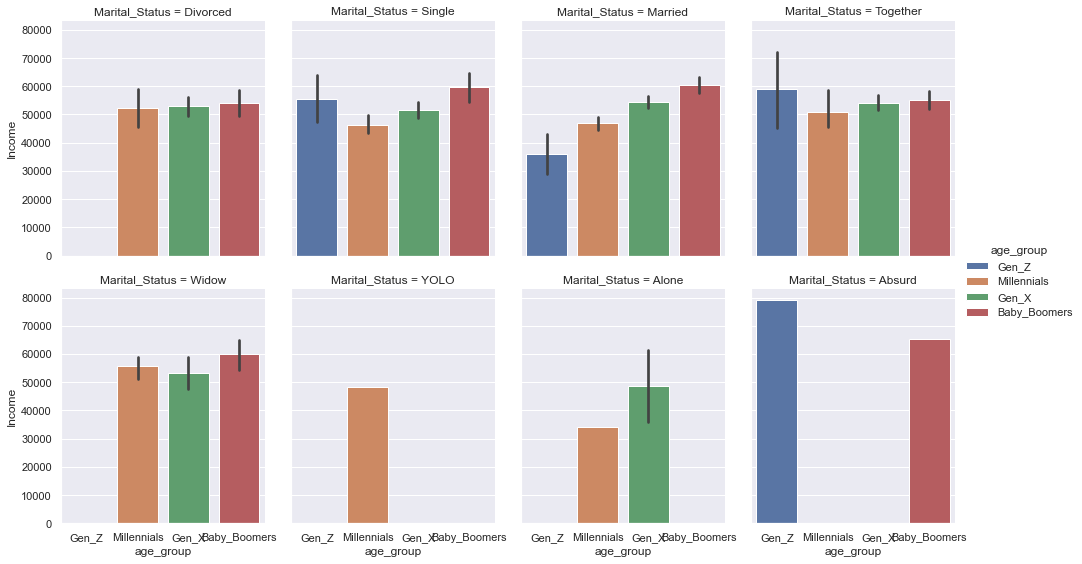

In [890]:
#Income vs Age Group, Separated by Marital Status

g = sns.FacetGrid(
    marketing_date, 
    col="Marital_Status", 
    # row='Education',
    hue='age_group',
    height=4, aspect=0.85,
    col_wrap=4,
    # sharey=False
)
g.map_dataframe(sns.barplot, x="age_group", y='Income')
# g.set(ylim=(0, 150000))
g.add_legend();

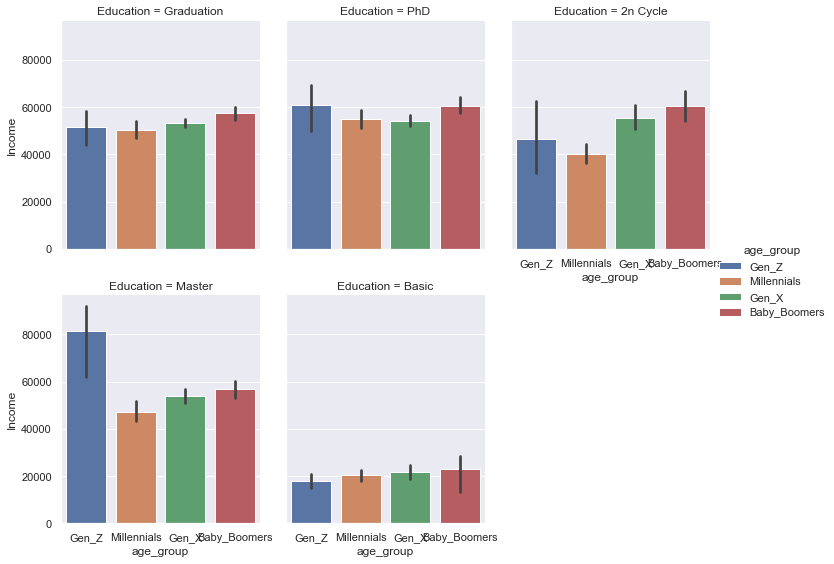

In [891]:
#Income vs Age Group, Separated by Education
g = sns.FacetGrid(
    marketing_date, 
    col="Education", 
    # row='Recency',
    hue='age_group',
    height=4, aspect=0.85,
    col_wrap=3,
    # sharey=False
)
g.map_dataframe(sns.barplot, x="age_group", y='Income')
# g.set(ylim=(0, 150000))
g.add_legend();

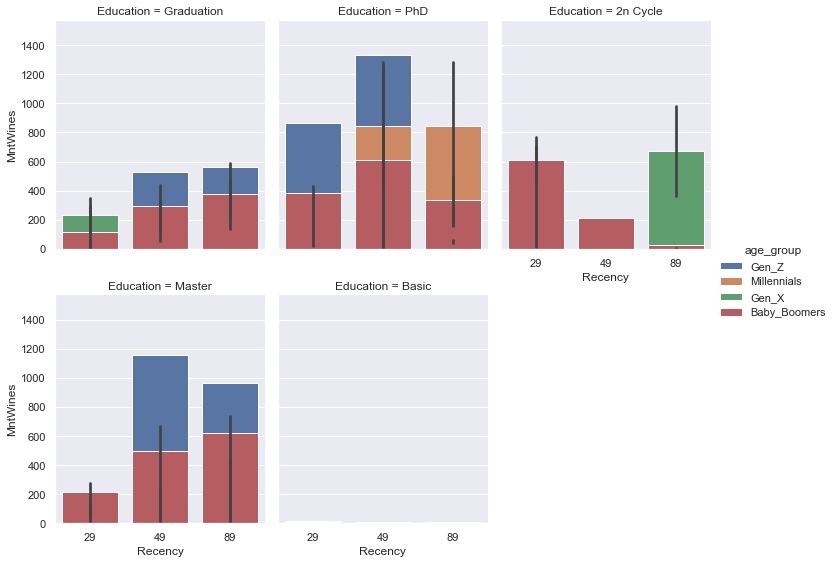

In [892]:
#Recency vs MntWines, Separated by Education
g = sns.FacetGrid(
    marketing_date, 
    col="Education", 
    # row='Recency',
    hue='age_group',
    height=4, aspect=0.85,
    col_wrap=3,
    # sharey=False
)
g.map_dataframe(sns.barplot, x="Recency", y='MntWines')
# g.set(ylim=(0, 150000))
g.add_legend();

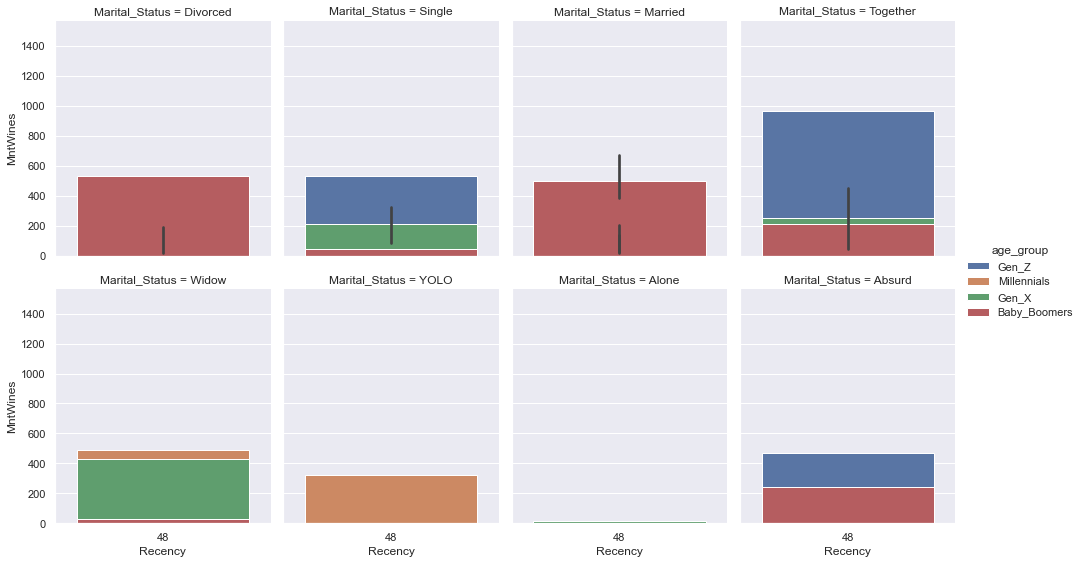

In [893]:
#Recency vs MntWines, Separated by Marital Status
g = sns.FacetGrid(
    marketing_date, 
    col="Marital_Status", 
    # row='Recency',
    hue='age_group',
    height=4, aspect=0.85,
    col_wrap=4,
    # sharey=False
)
g.map_dataframe(sns.barplot, x="Recency", y='MntWines')
# g.set(ylim=(0, 150000))
g.add_legend();


In [894]:
marketing_date.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'NumWebPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'year', 'month', 'week',
       'day', 'churn_45d', 'age', 'age_group'],
      dtype='object')

In [895]:
id_mnt = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income','Recency',
       'NumWebPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'year', 'month', 'week',
       'day', 'churn_45d', 'age', 'age_group']


In [896]:
id_campaigns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','year', 'month', 'week',
       'day', 'churn_45d', 'age', 'age_group']


In [897]:
temp_mnt = marketing_date.melt(id_vars=id_mnt)
temp_mnt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Recency,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,...,AcceptedCmp2,year,month,week,day,churn_45d,age,age_group,variable,value
0,1826,1970,Graduation,Divorced,84835.0,0,4,1,0,0,...,0,2014,6,25,Monday,NaN,44,Gen_X,MntWines,189
1,1,1961,Graduation,Single,57091.0,0,7,5,0,0,...,1,2014,6,24,Sunday,NaN,53,Gen_X,MntWines,464
2,10476,1958,Graduation,Married,67267.0,0,3,2,0,0,...,0,2014,5,20,Tuesday,NaN,56,Gen_X,MntWines,134
3,1386,1967,Graduation,Together,32474.0,0,1,7,0,0,...,0,2014,5,19,Sunday,NaN,47,Gen_X,MntWines,10
4,5371,1989,Graduation,Single,21474.0,0,3,7,1,0,...,0,2014,4,15,Tuesday,NaN,25,Millennials,MntWines,6


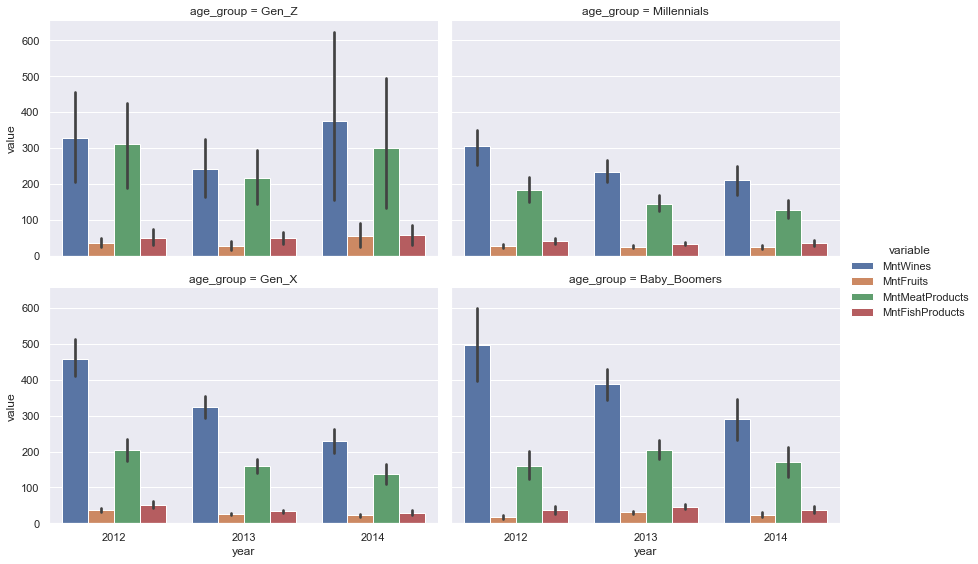

In [898]:
# year to year Amount Spent per product, per age-group

sns.catplot(
    x="year", y="value", hue='variable', 
    col='age_group', 
    data=temp_mnt, 
    col_wrap=2,
    kind='bar',height=4, aspect=1.5);

In [899]:
temp_campaign = marketing_date.melt(id_vars=id_campaigns)
temp_campaign

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,year,month,week,day,churn_45d,age,age_group,variable,value
0,1826,1970,Graduation,Divorced,84835.0,0,189,104,379,111,2014,6,25,Monday,NaN,44,Gen_X,NumWebPurchases,4
1,1,1961,Graduation,Single,57091.0,0,464,5,64,7,2014,6,24,Sunday,NaN,53,Gen_X,NumWebPurchases,7
2,10476,1958,Graduation,Married,67267.0,0,134,11,59,15,2014,5,20,Tuesday,NaN,56,Gen_X,NumWebPurchases,3
3,1386,1967,Graduation,Together,32474.0,0,10,0,1,0,2014,5,19,Sunday,NaN,47,Gen_X,NumWebPurchases,1
4,5371,1989,Graduation,Single,21474.0,0,6,16,24,11,2014,4,15,Tuesday,NaN,25,Millennials,NumWebPurchases,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15507,10142,1976,PhD,Divorced,66476.0,99,372,18,126,47,2013,3,10,Thursday,yes,37,Millennials,AcceptedCmp2,0
15508,5263,1977,2n Cycle,Married,31056.0,99,5,10,13,3,2013,1,4,Tuesday,yes,36,Millennials,AcceptedCmp2,0
15509,22,1976,Graduation,Divorced,46310.0,99,185,2,88,15,2012,12,49,Monday,yes,36,Millennials,AcceptedCmp2,0
15510,528,1978,Graduation,Married,65819.0,99,267,38,701,149,2012,11,48,Thursday,yes,34,Millennials,AcceptedCmp2,0


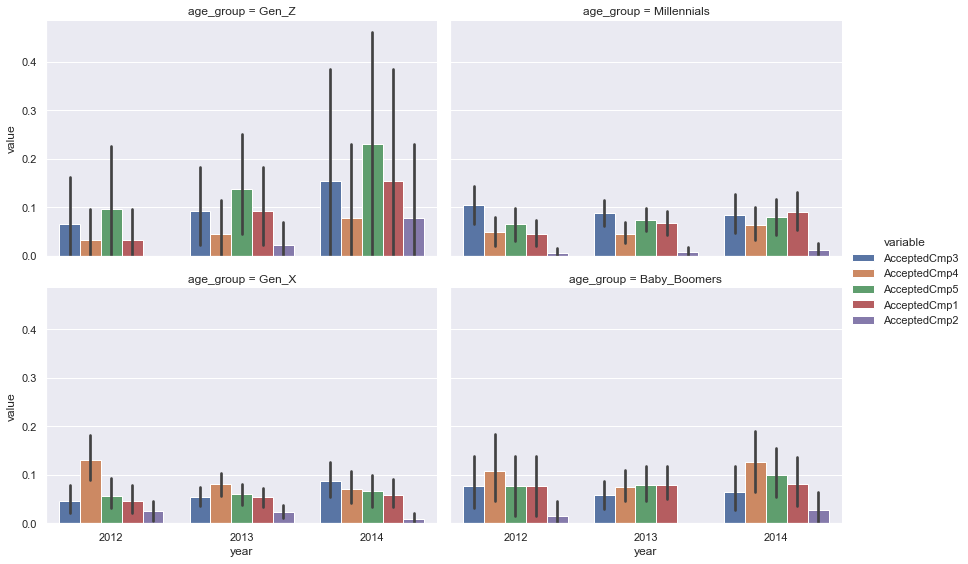

In [900]:
# year to year campaign effectiveness per age_group

sns.catplot(
    x="year", y="value", hue='variable',
    col='age_group',
    col_wrap=2,
    data=temp_campaign.query('variable != "NumWebPurchases" and variable != "NumWebVisitsMonth"'), 
    kind='bar',height=4, aspect=1.5);

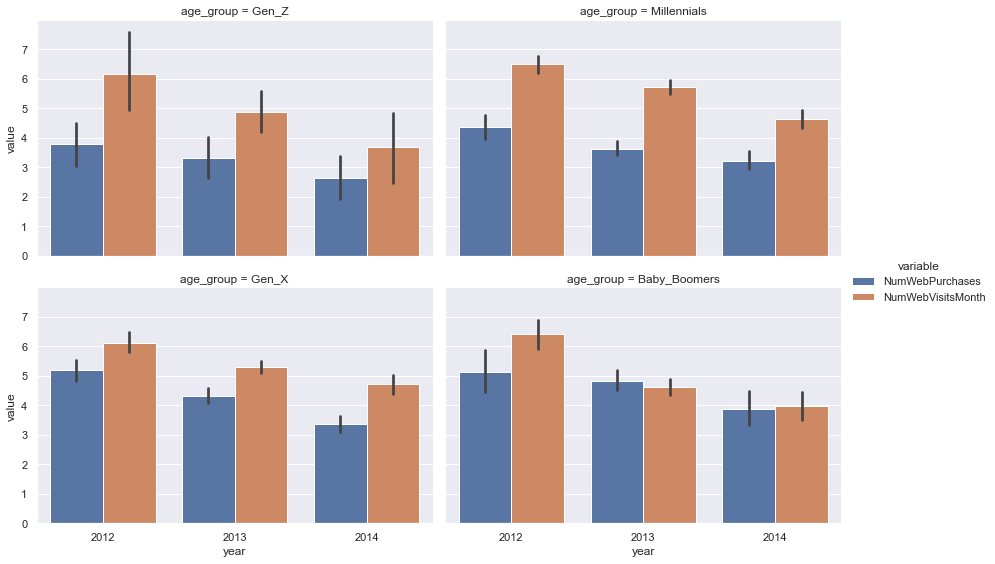

In [901]:
# year to year conversion rate per age_group

sns.catplot(
    x="year", y="value", hue='variable',
    col='age_group',
    col_wrap=2,
    data=temp_campaign.query('variable == "NumWebPurchases" or variable == "NumWebVisitsMonth" '),
    kind='bar',height=4, aspect=1.5);

In [902]:
marketing_date['conversion_rate'] = marketing_date.NumWebPurchases/marketing_date.NumWebVisitsMonth*100
marketing_date

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,year,month,week,day,churn_45d,age,age_group,conversion_rate
Dt_Customer,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Graduation,Divorced,84835.0,0,189,104,379,111,...,0,0,2014,6,25,Monday,NaN,44,Gen_X,400.000000
2014-06-15,1,1961,Graduation,Single,57091.0,0,464,5,64,7,...,0,1,2014,6,24,Sunday,NaN,53,Gen_X,140.000000
2014-05-13,10476,1958,Graduation,Married,67267.0,0,134,11,59,15,...,0,0,2014,5,20,Tuesday,NaN,56,Gen_X,150.000000
2014-05-11,1386,1967,Graduation,Together,32474.0,0,10,0,1,0,...,0,0,2014,5,19,Sunday,NaN,47,Gen_X,14.285714
2014-04-08,5371,1989,Graduation,Single,21474.0,0,6,16,24,11,...,0,0,2014,4,15,Tuesday,NaN,25,Millennials,42.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-07,10142,1976,PhD,Divorced,66476.0,99,372,18,126,47,...,0,0,2013,3,10,Thursday,yes,37,Millennials,125.000000
2013-01-22,5263,1977,2n Cycle,Married,31056.0,99,5,10,13,3,...,0,0,2013,1,4,Tuesday,yes,36,Millennials,12.500000
2012-12-03,22,1976,Graduation,Divorced,46310.0,99,185,2,88,15,...,0,0,2012,12,49,Monday,yes,36,Millennials,75.000000


/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


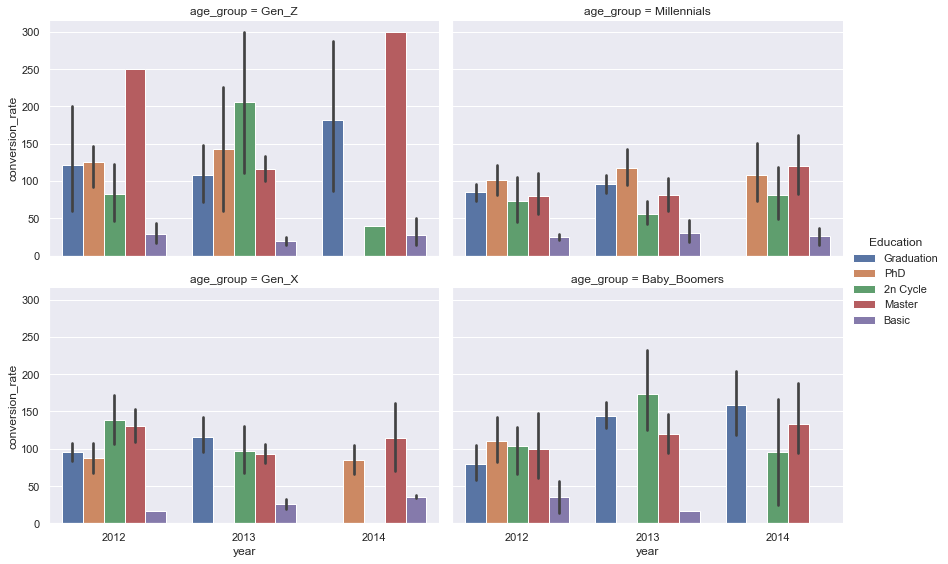

In [903]:
# year to year conversion rate per age_group per Education

sns.catplot(
    x="year", y="conversion_rate", hue='Education',
    col='age_group',
    col_wrap=2,
    data=marketing_date,
    kind='bar',height=4, aspect=1.5);

/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


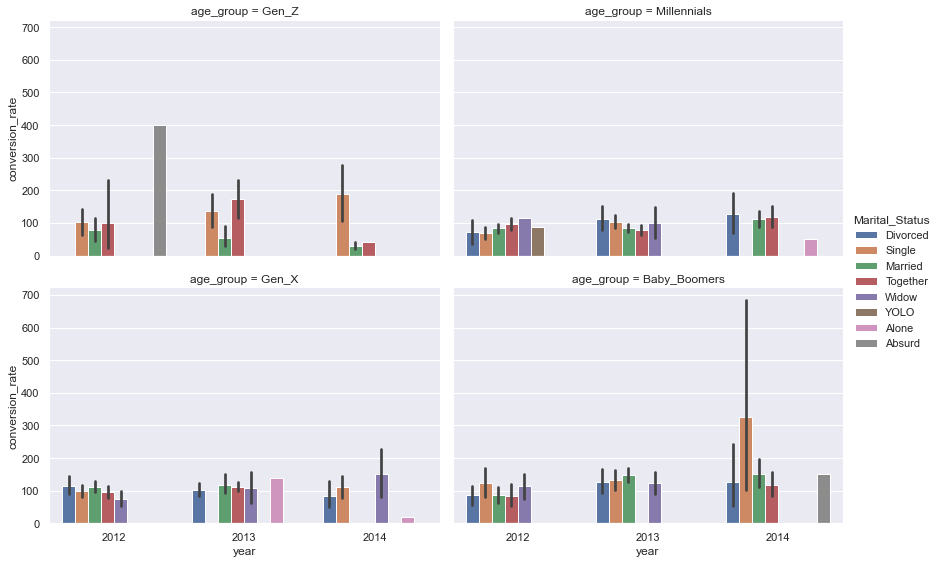

In [904]:
# year to year conversion rate per age_group per Marital Status

sns.catplot(
    x="year", y="conversion_rate", hue='Marital_Status',
    col='age_group',
    col_wrap=2,
    data=marketing_date,
    kind='bar',height=4, aspect=1.5);

/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


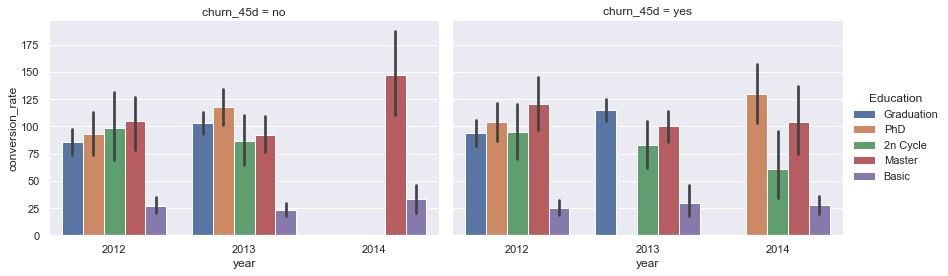

In [911]:
# year to year conversion rate per age_group per churn 45d

sns.catplot(
    x="year", y="conversion_rate", hue='Education',
    col='churn_45d',
    col_wrap=2,
    data=marketing_date,
    kind='bar',height=4, aspect=1.5);

/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


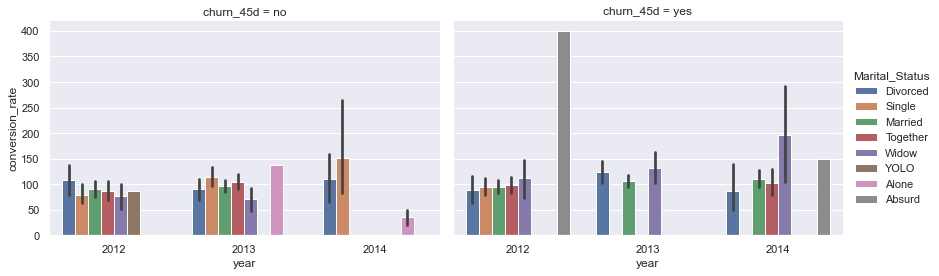

In [912]:
# year to year conversion rate per age_group per churn 45d

sns.catplot(
    x="year", y="conversion_rate", hue='Marital_Status',
    col='churn_45d',
    col_wrap=2,
    data=marketing_date,
    kind='bar',height=4, aspect=1.5);

/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/ariewijaya/miniconda3/envs/pacmann/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


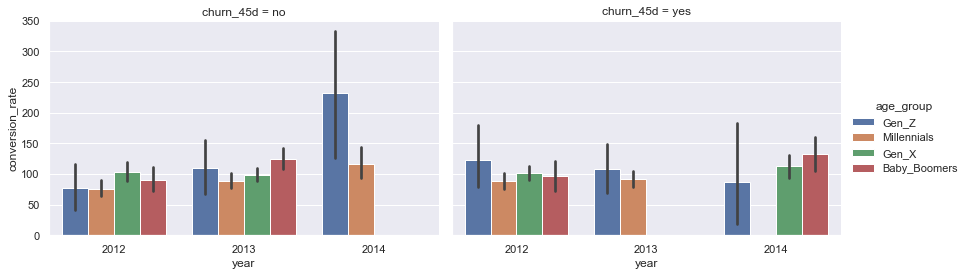

In [915]:
# year to year conversion rate per age_group per churn 45d

sns.catplot(
    x="year", y="conversion_rate", hue='age_group',
    col='churn_45d',
    col_wrap=2,
    data=marketing_date,
    kind='bar',height=4, aspect=1.5);

In [1003]:
marketing_date.to_csv('marketing.csv', index=False)

In [906]:
marketing_date.head().T


Dt_Customer,2014-06-16,2014-06-15,2014-05-13,2014-05-11,2014-04-08
ID,1826,1,10476,1386,5371
Year_Birth,1970,1961,1958,1967,1989
Education,Graduation,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Single,Married,Together,Single
Income,84835.0,57091.0,67267.0,32474.0,21474.0
Recency,0,0,0,0,0
MntWines,189,464,134,10,6
MntFruits,104,5,11,0,16
MntMeatProducts,379,64,59,1,24
MntFishProducts,111,7,15,0,11


In [907]:
temp = marketing_date[['age','age_group','MntFishProducts', 'MntFruits', 'MntMeatProducts', 'MntWines']].melt(['age','age_group'], var_name='Mnt', value_name='Amount')
temp

,age,age_group,Mnt,Amount
0,44,Gen_X,MntFishProducts,111
1,53,Gen_X,MntFishProducts,7
2,56,Gen_X,MntFishProducts,15
3,47,Gen_X,MntFishProducts,0
4,25,Millennials,MntFishProducts,11
...,...,...,...,...
8859,37,Millennials,MntWines,372
8860,36,Millennials,MntWines,5
8861,36,Millennials,MntWines,185
8862,34,Millennials,MntWines,267


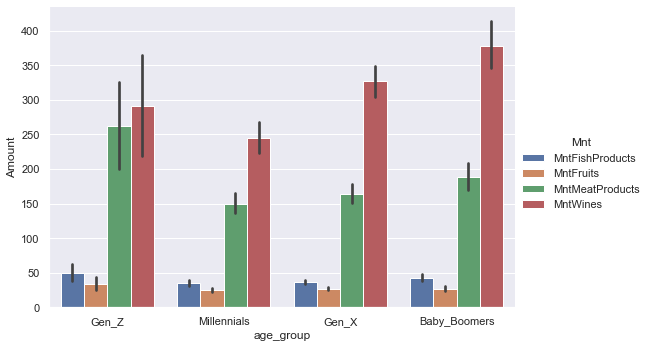

In [908]:
sns.catplot(x="age_group", y="Amount", hue='Mnt', data=temp, kind='bar',height=5, aspect=1.5);

# 11. BizDev - A/B Testing

In [909]:
from statsmodels.stats.proportion import power_proportions_2indep, test_proportions_2indep
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.power import tt_ind_solve_power

In [687]:
ab_test = pd.read_csv('ab.csv',parse_dates=['timestamp'])
ab_test.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [693]:
session_count = \
ab_test['user_id'].value_counts(ascending=False)
session_count

805339    2
754884    2
722274    2
783176    2
898232    2
         ..
642985    1
771499    1
923606    1
712675    1
715931    1
Name: user_id, Length: 290584, dtype: int64

In [701]:
multiple_login = session_count[session_count > 1].count()
multiple_login

3894

In [704]:
# dropping multiple login

users_to_drop = session_count[session_count>1].index
users_to_drop

Int64Index([805339, 754884, 722274, 783176, 898232, 899018, 904570, 842042,
            881123, 858720,
            ...
            721188, 902463, 713355, 827417, 655283, 847058, 889392, 664150,
            835401, 736955],
           dtype='int64', length=3894)

In [716]:
ab_test = ab_test[~ab_test['user_id'].isin(users_to_drop)]
ab_test

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [717]:
ab_test.group.value_counts()

treatment    143397
control      143293
Name: group, dtype: int64

In [729]:
conversion_rate = \
ab_test.groupby('group')['converted'].agg({np.std, np.mean})

In [731]:
conversion_rate.columns = ['std_dev', 'conversion_rate']

In [732]:
conversion_rate

,std_dev,conversion_rate
group,,
control,0.325165,0.120173
treatment,0.323467,0.118726


<AxesSubplot:xlabel='group', ylabel='converted'>

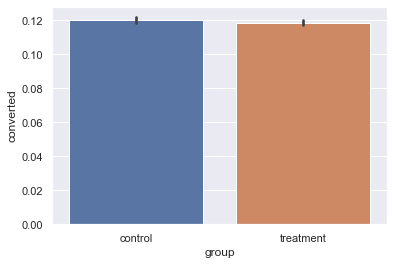

In [738]:
sns.barplot(data=ab_test, x='group', y='converted')

### Calculating p-value and confidence interval

In [739]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [741]:
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

In [744]:
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

In [747]:
z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: 1.19
p-value: 0.232
ci 95% for control group: [0.118, 0.122]
ci 95% for treatment group: [0.117, 0.120]


> p-value is above 0.05 threshold --> accepting null hypotesis

### New and old page is not statistically difference in terms of conversion rate

In [987]:
ab_test

,user_id,timestamp,group,landing_page,converted,month,day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,8
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,21
...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,3
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,12
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,22
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,15


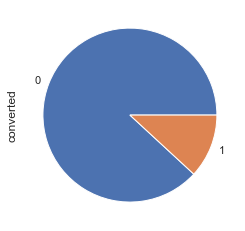

In [996]:
ab_test.query('landing_page == "new_page"').converted.value_counts(normalize=True)\
.plot.pie();

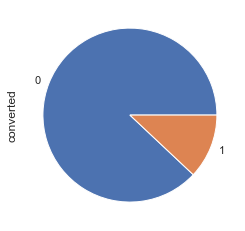

In [997]:
ab_test.query('landing_page == "old_page"').converted.value_counts(normalize=True)\
.plot.pie();

In [936]:
ab_test.groupby('converted').count()/len(ab_test)*100

,user_id,timestamp,group,landing_page
converted,,,,
0,88.055042,88.055042,88.055042,88.055042
1,11.944958,11.944958,11.944958,11.944958


Barchart :  X Axis time per hours

                 Y axis convertion landing page

In [943]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286690 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       286690 non-null  int64         
 1   timestamp     286690 non-null  datetime64[ns]
 2   group         286690 non-null  object        
 3   landing_page  286690 non-null  object        
 4   converted     286690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 21.2+ MB


In [998]:
print(ab_test['timestamp'].dt.day.value_counts())

8     13231
10    13184
11    13183
6     13168
23    13164
21    13139
15    13081
9     13064
22    13059
20    13051
3     13025
7     13013
12    12992
14    12983
17    12976
19    12968
16    12948
4     12929
18    12915
13    12893
5     12748
24     7345
2      5631
Name: timestamp, dtype: int64


In [961]:
ab_test['day'] = ab_test['timestamp'].dt.day
ab_test

,user_id,timestamp,group,landing_page,converted,month,day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,8
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,21
...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,3
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,12
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,22
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,15


In [979]:
converted_user

,user_id,timestamp,group,landing_page,converted,month
day,,,,,,
2,690,690,690,690,690,690
3,1483,1483,1483,1483,1483,1483
4,1540,1540,1540,1540,1540,1540
5,1514,1514,1514,1514,1514,1514
6,1572,1572,1572,1572,1572,1572
7,1539,1539,1539,1539,1539,1539
8,1587,1587,1587,1587,1587,1587
9,1553,1553,1553,1553,1553,1553
10,1580,1580,1580,1580,1580,1580


<AxesSubplot:xlabel='day'>

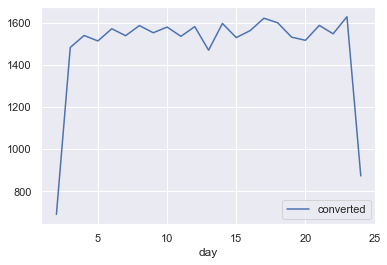

In [985]:
# converted_user = \
ab_test.query('converted ==1').groupby('day').count().reset_index()\
.plot(kind='line', x='day', y='converted')

In [1000]:
ab_test

,user_id,timestamp,group,landing_page,converted,month,day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,8
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,21
...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,3
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,12
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,22
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,15


In [1004]:
ab_test.to_csv('ab_test.csv')